In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import skew
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import os
import random
from scipy.stats import f_oneway
import csv
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


%matplotlib inline
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Loading & Inspecting Data

In [2]:
# Loading the data

data = pd.read_csv('breast-cancer-wisconsin-data.csv') # read in the data

In [3]:
# Check the first few head rows of the data to get a sense of what it looks like

data.head(3)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33            184.6      2019.0   
1  ...         24.99          23.41            158.8      1956.0   
2  ...         23.57          25.53            152.5      1709.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  

[3 rows x 32 columns]

In [4]:
# Check the first few tail rows of the data to get a sense of what it looks like

data.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

In [5]:
# Check the number of rows and columns in the data set.

print(data.shape)

(569, 32)


In [6]:
# Check the data types.
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
# Check for missing values in the data set

print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [10]:
# check for duplicates in the entire dataframe

print(data.duplicated().sum())

0


# Data Cleaning

In [7]:
# Drop the ID column

data.drop('id', axis=1 , inplace=True)
data

#ID data has number ID so this column do not effect my target values. We will drop ID 

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

# Data Exploration

In [8]:
# Calculating basic statistics for each column in the data set

data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [9]:
# Comparing the mean of malignant and benign features 
data.groupby('diagnosis').mean()

radius_mean  texture_mean  perimeter_mean   area_mean  \
diagnosis                                                          
B            12.146524     17.914762       78.075406  462.790196   
M            17.462830     21.604906      115.365377  978.376415   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
B                 0.092478          0.080085        0.046058   
M                 0.102898          0.145188        0.160775   

           concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
diagnosis                                                              ...   
B                     0.025717       0.174186                0.062867  ...   
M                     0.087990       0.192909                0.062680  ...   

           radius_worst  texture_worst  perimeter_worst   area_worst  \
diagnosis                                                              
B             13.379801      23.515070        87.005938   558.899440   
M             21.134811      29.318208       141.370330  1422.286321   

           smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                         
B                  0.124959           0.182673         0.166238   
M                  0.144845           0.374824         0.450606   

           concave points_worst  symmetry_worst  fractal_dimension_worst  
diagnosis                                                                 
B                      0.074444        0.270246                 0.079442  
M                      0.182237        0.323468                 0.091530  

[2 rows x 30 columns]

In [10]:
# ANOVA Test

from scipy.stats import f_oneway

# Separate the data into groups based on the diagnosis (M/B)
M_data = data[data['diagnosis'] == 'M']['radius_mean']
B_data = data[data['diagnosis'] == 'B']['radius_mean']

# Perform ANOVA
f_statistic, p_value = f_oneway(M_data, B_data)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)


F-statistic: 646.9810209786452
p-value: 8.46594057226382e-96


In [11]:
# T-test

# Divide the data into two groups based on the diagnosis column
group1 = data[data["diagnosis"] == "M"]["radius_mean"]
group2 = data[data["diagnosis"] == "B"]["radius_mean"]

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 25.435821610057054
p-value: 8.465940572262422e-96


In [12]:
# Chi_square test on the radius mean feature
data1 = pd.read_csv('breast-cancer-wisconsin-data.csv') # read in the data
# Step 1: create bin column
num_bins = 5
data1['radius_mean_bin'] = pd.cut(data1['radius_mean'], bins=num_bins)

# Step 2: create pivot table
table = pd.pivot_table(data1, values='id', index='radius_mean_bin', columns='diagnosis', aggfunc='count')

# Step 3: calculate expected counts
total_count = table.sum().sum()
row_totals = table.sum(axis=1)
col_totals = table.sum()
expected = np.outer(row_totals, col_totals) / total_count

# Step 4: calculate chi-square statistic
observed = table.values
chi_squared = np.sum((observed - expected)**2 / expected)
print('Chi-square statistic for radius_mean: {:.2f}'.format(chi_squared))


Chi-square statistic for radius_mean: 318.75


In [13]:
# Chi sqaure analysis between radius_mean and perimeter_worst
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('breast-cancer-wisconsin-data.csv')

# Create a contingency table between radius_mean and perimeter_worst
contingency_table = pd.crosstab(df['radius_mean'], df['perimeter_worst'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2:.2f}")
print(f"p-value: {p_value:.2f}")

Chi-square value: 234064.47
p-value: 0.17


In [14]:
# Check the diagnosis value count

data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Data Visualization

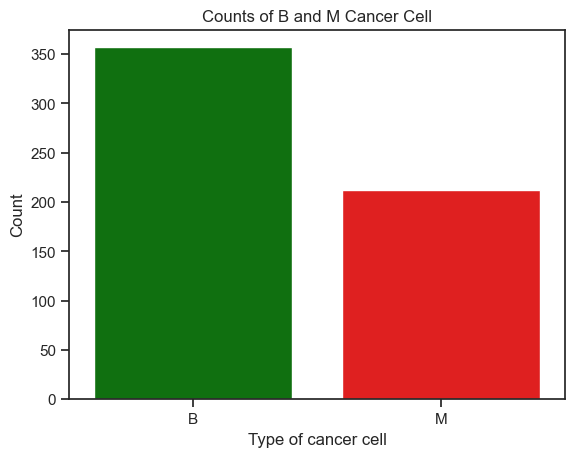

In [15]:
# Visualising the diagnosis value count

colors = ["green", "red"]
sns.barplot(x=data.diagnosis.value_counts().index, y=data.diagnosis.value_counts(), palette=colors)
plt.xlabel("Type of cancer cell")
plt.ylabel("Count")
plt.title("Counts of B and M Cancer Cell")
plt.show()

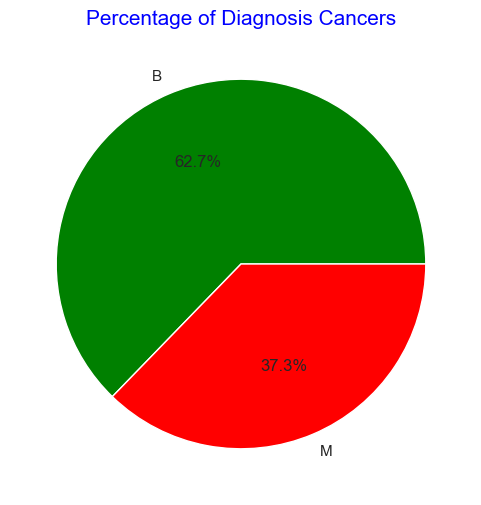

In [16]:
# Visualising the diagnosis count in percentage

labels = data.diagnosis.value_counts().index
colors = ['green','red']
explode = [0,0]
sizes = [357, 212]
plt.figure(figsize = (6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of Diagnosis Cancers',color = 'blue',fontsize = 15)
plt.show()

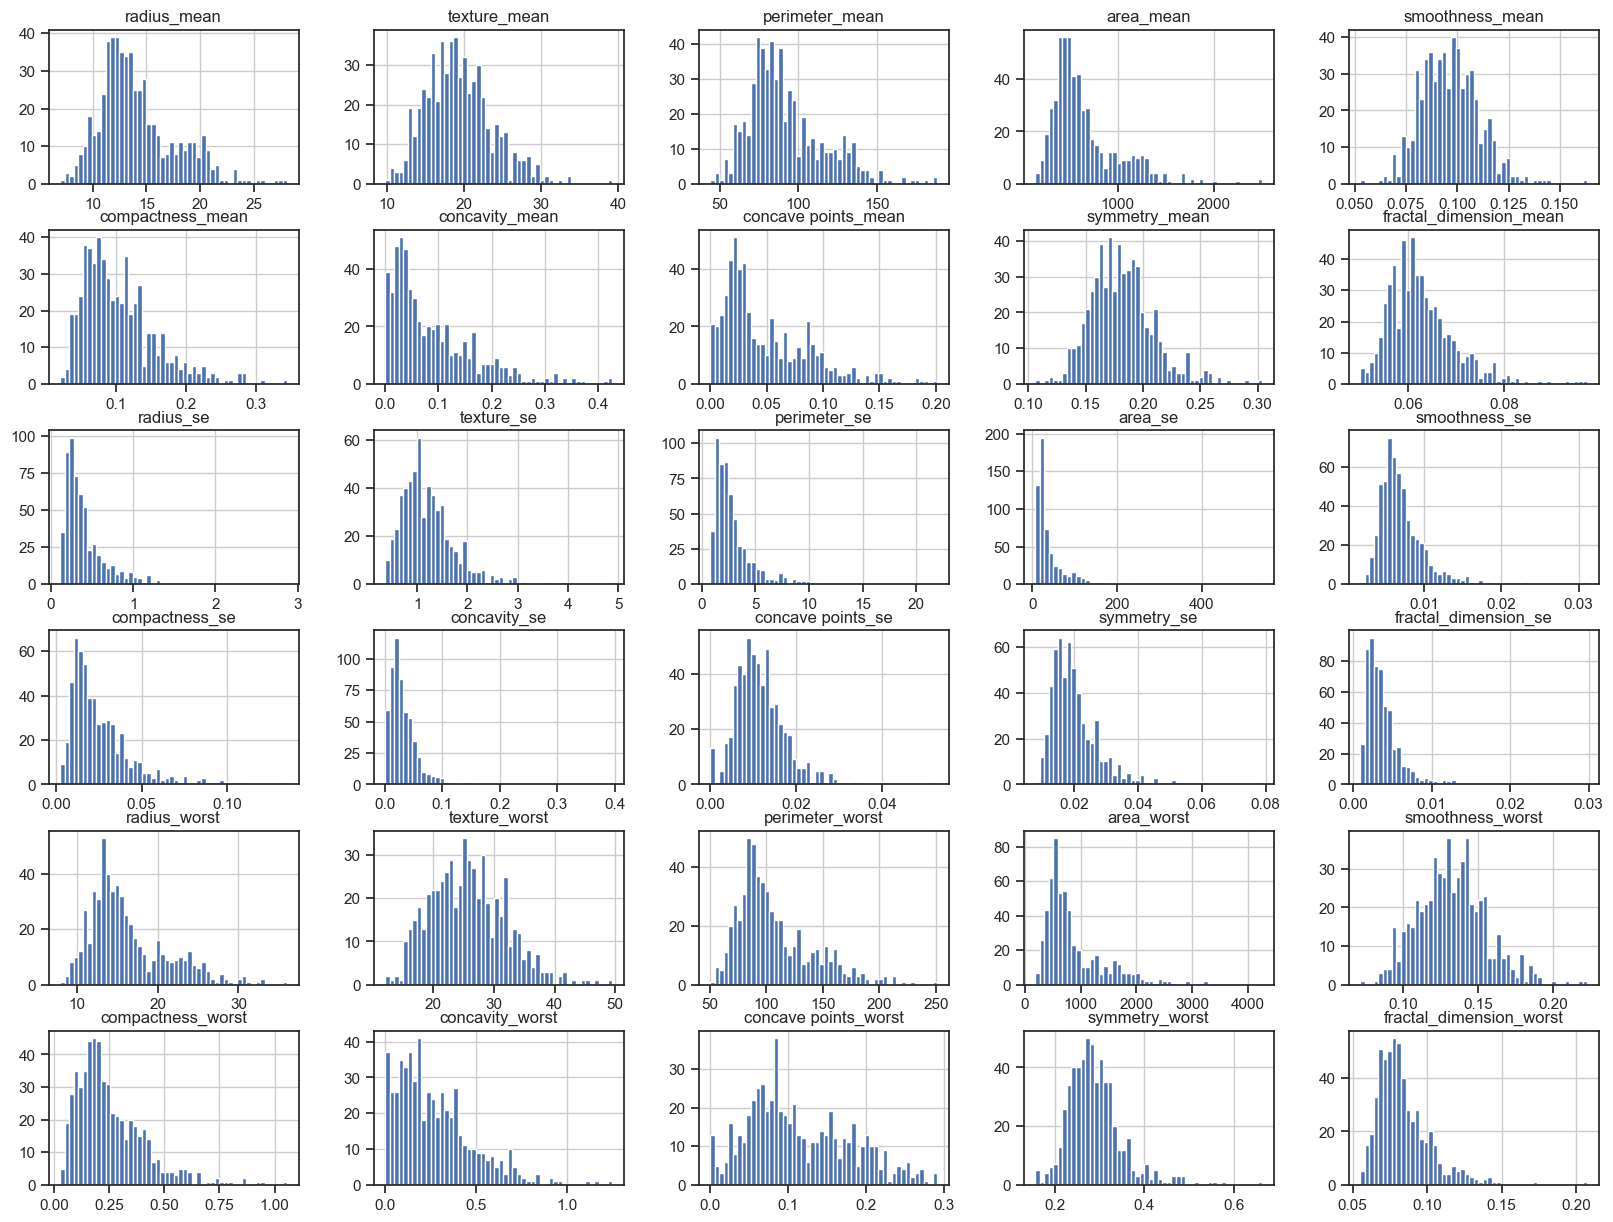

In [17]:
# Visualize the distribution of each column in the data set using histograms

import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
plt.show()

In [18]:
# print skewness by iterating over each column
for column in data.select_dtypes(include='number'):
    skewness = skew(data[column])
    print(f"{column}: {skewness:.2f}")

radius_mean: 0.94
texture_mean: 0.65
perimeter_mean: 0.99
area_mean: 1.64
smoothness_mean: 0.46
compactness_mean: 1.19
concavity_mean: 1.40
concave points_mean: 1.17
symmetry_mean: 0.72
fractal_dimension_mean: 1.30
radius_se: 3.08
texture_se: 1.64
perimeter_se: 3.43
area_se: 5.43
smoothness_se: 2.31
compactness_se: 1.90
concavity_se: 5.10
concave points_se: 1.44
symmetry_se: 2.19
fractal_dimension_se: 3.91
radius_worst: 1.10
texture_worst: 0.50
perimeter_worst: 1.13
area_worst: 1.85
smoothness_worst: 0.41
compactness_worst: 1.47
concavity_worst: 1.15
concave points_worst: 0.49
symmetry_worst: 1.43
fractal_dimension_worst: 1.66


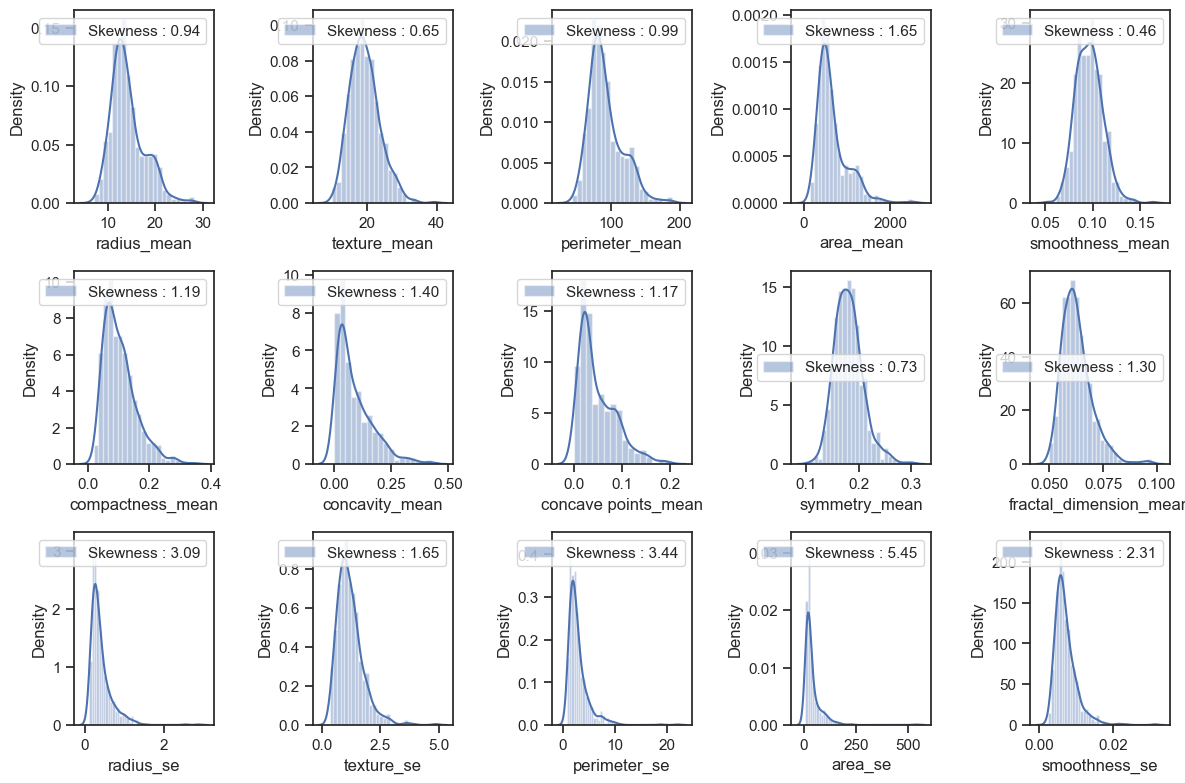

In [19]:
# Distribution plots to visualize skewness

y = data.diagnosis 
x = data.drop(columns= "diagnosis") 

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 8))

for i, ax in enumerate(axes.flatten()):
    g = sns.distplot(x.iloc[:, i], color="b", label="Skewness : %.2f"%(x.iloc[:, i].skew()), ax=ax)
    g = g.legend(loc="best")
    
plt.tight_layout()
plt.show()

In [20]:
# Categorizing our data into 3 groups

mean_data = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
se_data = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
worst_data = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [21]:
# standardization to group similar features together(se, mean and worst)

x_ = (x - x.mean()) / x.std() 

In [22]:
# Grouping features

colors = ["red", "green"]
mean_breast_cancer = pd.concat([y,x_.iloc[:,0:10]],axis=1)
mean_breast_cancer = pd.melt(mean_breast_cancer,id_vars="diagnosis", var_name="features", value_name='value')

se_breast_cancer = pd.concat([y,x_.iloc[:,10:20]],axis=1)
se_breast_cancer = pd.melt(se_breast_cancer,id_vars="diagnosis", var_name="features", value_name='value')

worst_breast_cancer = pd.concat([y,x_.iloc[:,20:30]],axis=1)
worst_breast_cancer = pd.melt(worst_breast_cancer,id_vars="diagnosis", var_name="features", value_name='value')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

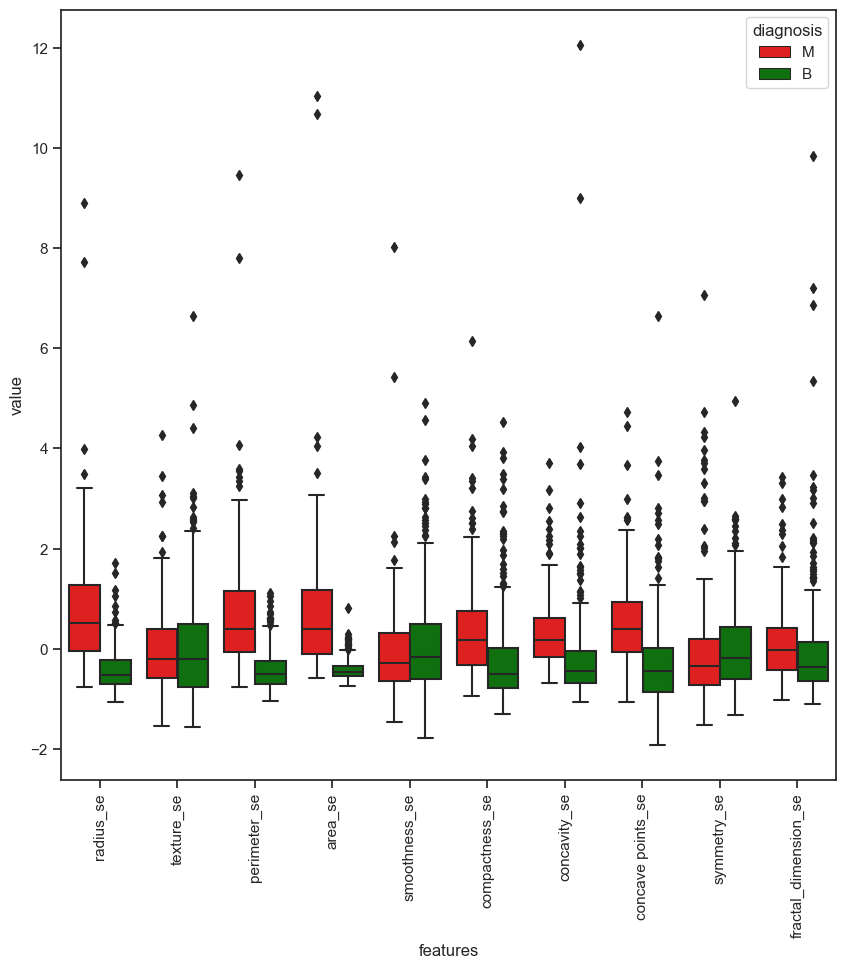

In [23]:
# Box plot for detecting outlier for the se_features

plt.figure(figsize=(10,10))
sns.boxplot(x ="features", y ="value", hue ="diagnosis", data = se_breast_cancer, palette = colors)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

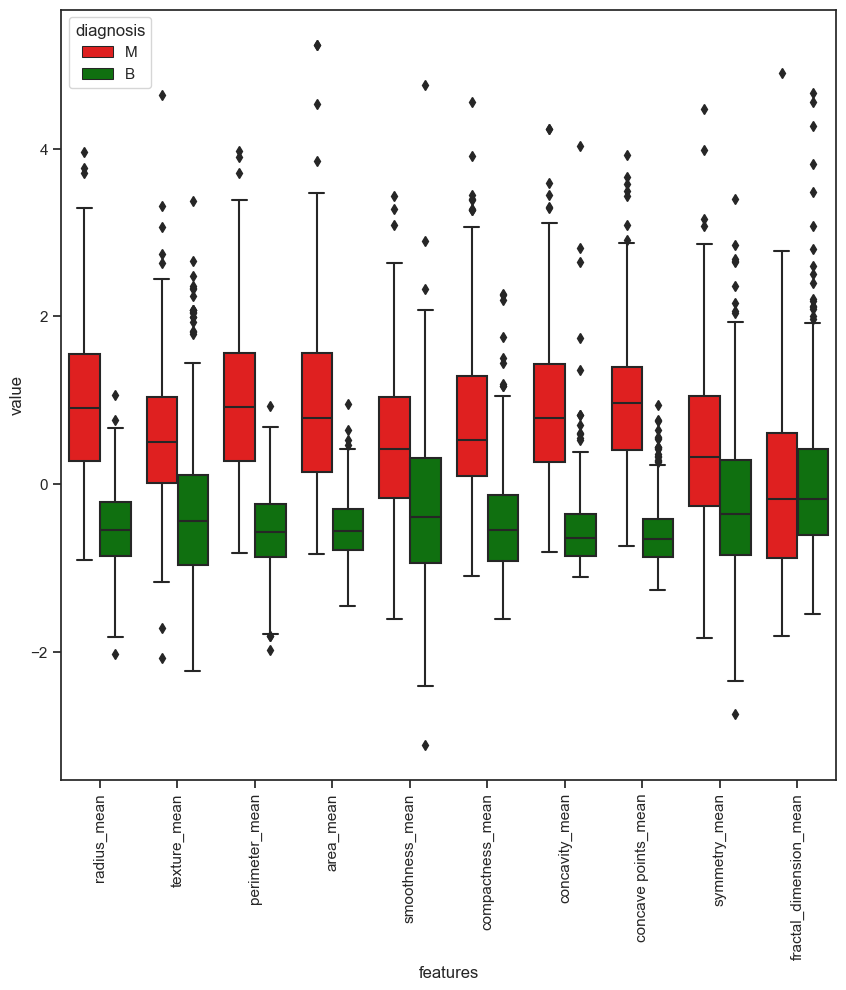

In [27]:
# Box plot for detecting outlier for the mean_features

plt.figure(figsize=(10,10))
sns.boxplot(x ="features", y ="value", hue ="diagnosis", data = mean_breast_cancer, palette = colors)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

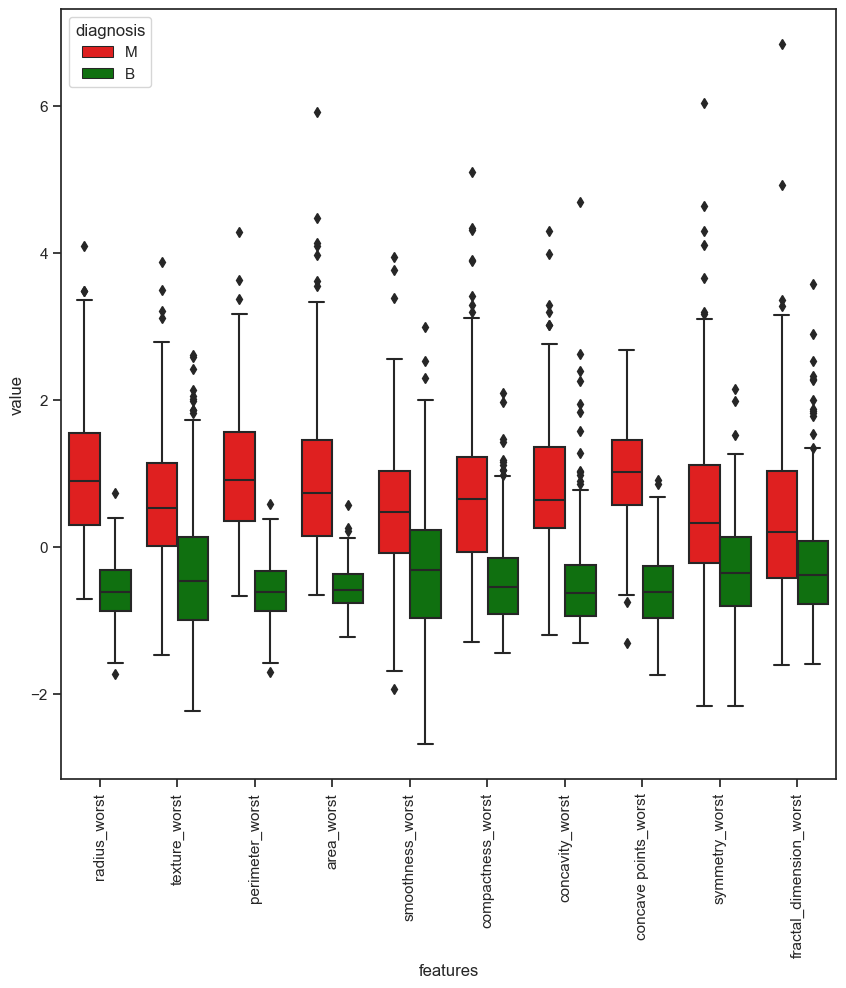

In [24]:
# Box plot for detecting outlier for the worst_features

plt.figure(figsize=(10,10))
sns.boxplot(x ="features", y ="value", hue ="diagnosis", data = worst_breast_cancer, palette = colors)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

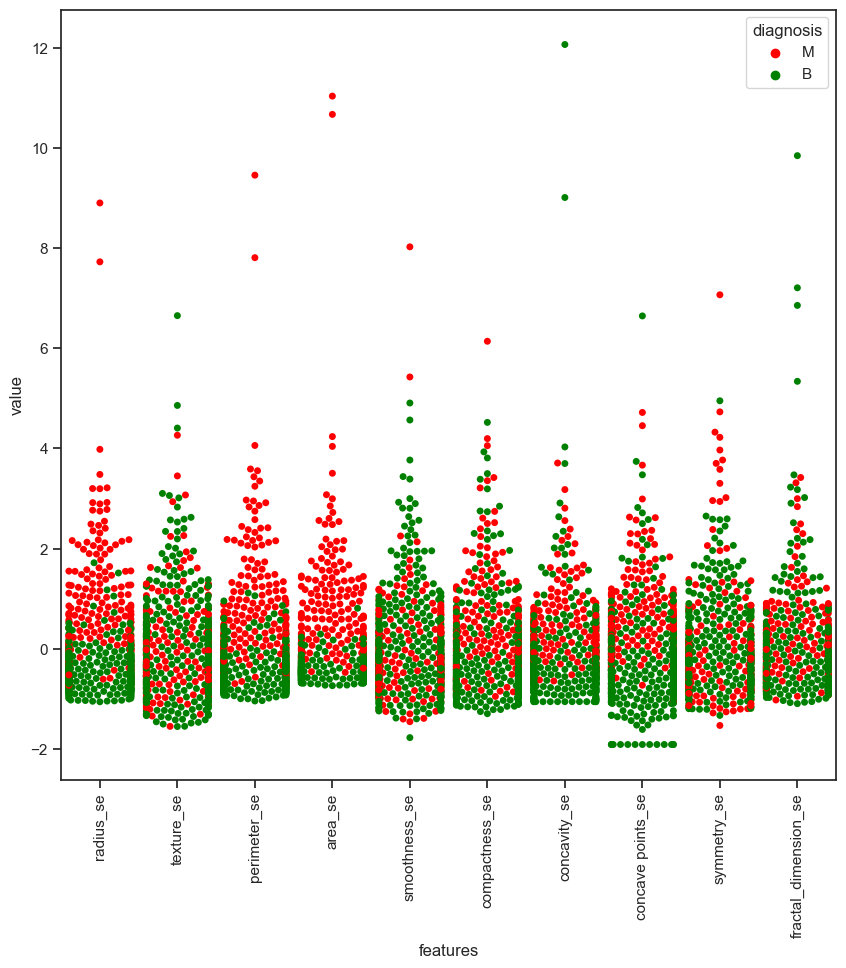

In [25]:
# Swarmplot for se_data

plt.figure(figsize=(10,10))
sns.swarmplot(x ="features", y ="value", hue ="diagnosis", data = se_breast_cancer, palette = colors)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

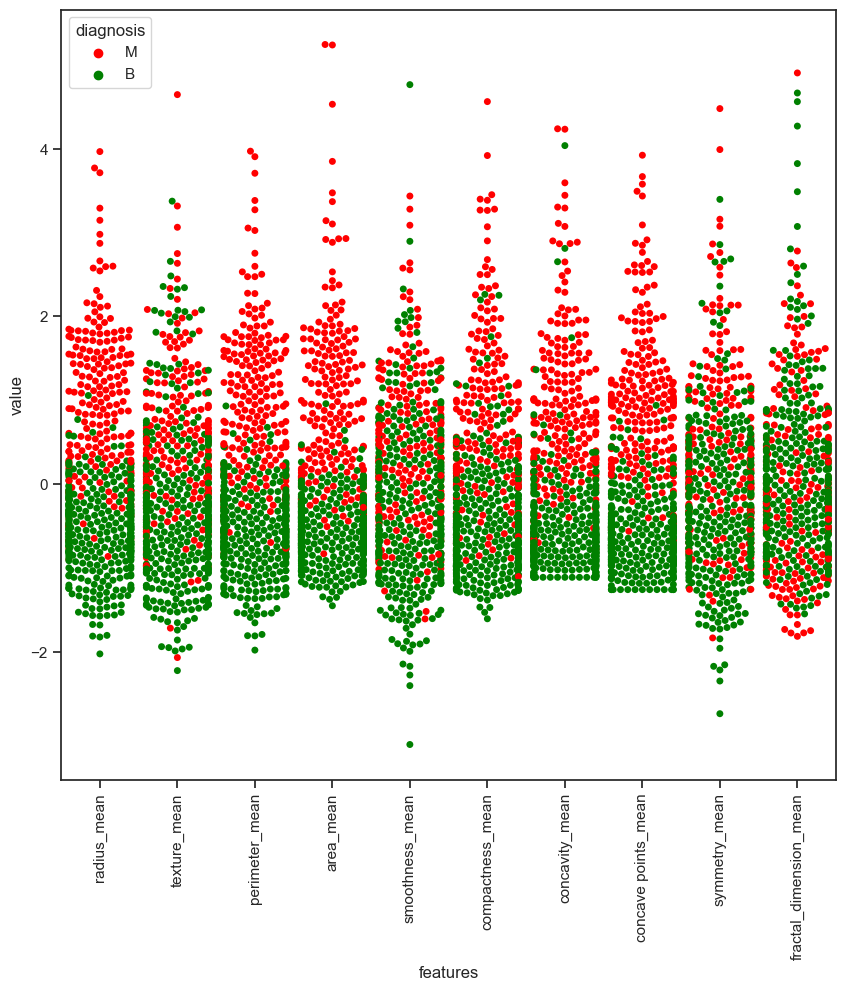

In [26]:
# Swarmplot for mean_data

plt.figure(figsize=(10,10))
sns.swarmplot(x ="features", y ="value", hue ="diagnosis", data = mean_breast_cancer, palette = colors)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

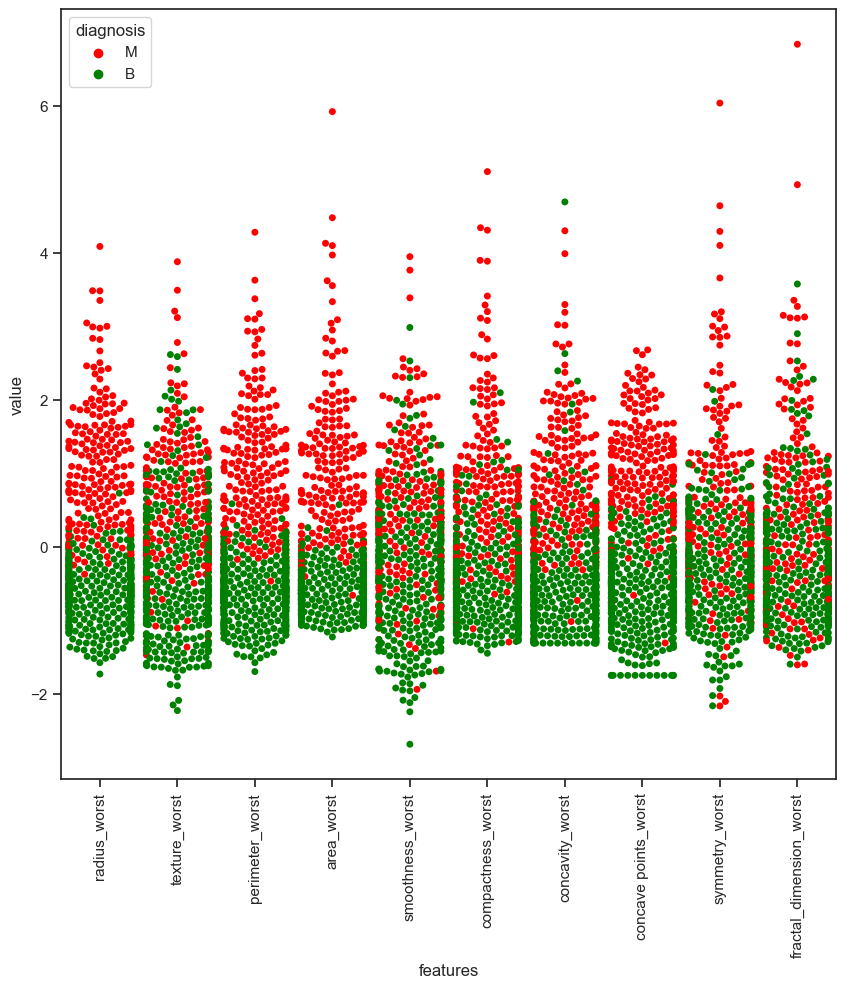

In [27]:
# Swarmplot for worst_data

plt.figure(figsize=(10,10))
sns.swarmplot(x ="features", y ="value", hue ="diagnosis", data = worst_breast_cancer, palette = colors)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

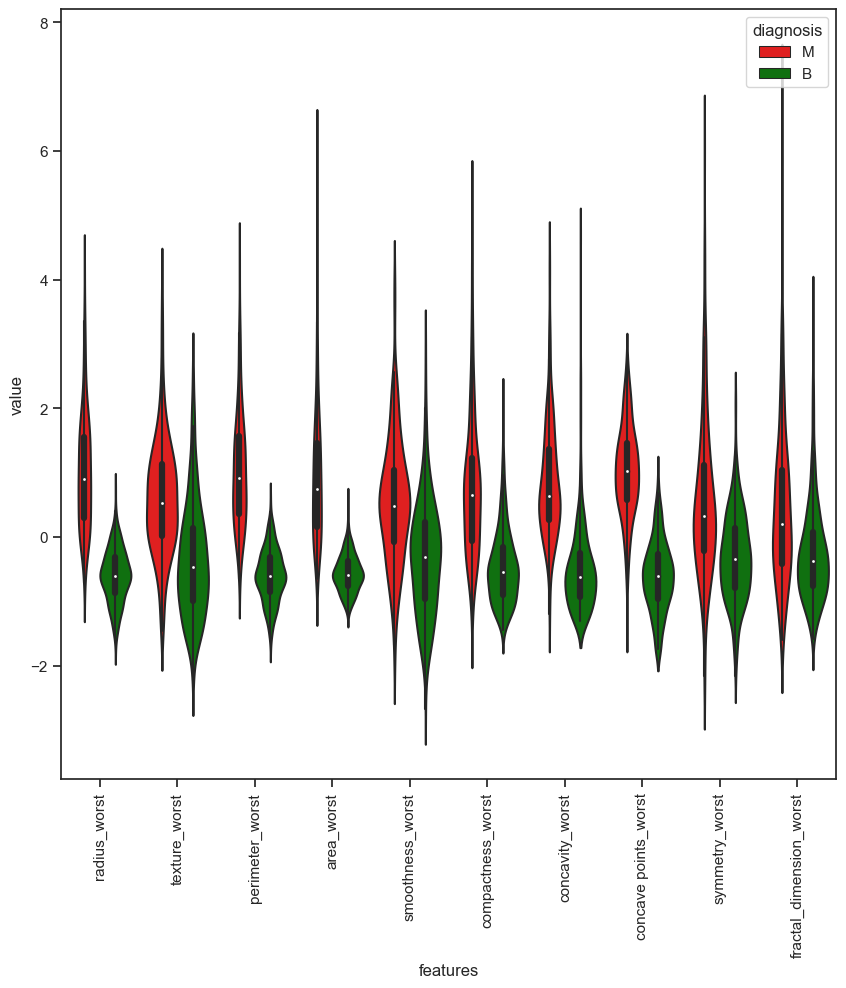

In [28]:
# Violin plot for worst data

plt.figure(figsize=(10,10))
sns.violinplot(x ="features", y ="value", hue ="diagnosis", data = worst_breast_cancer, palette = colors)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

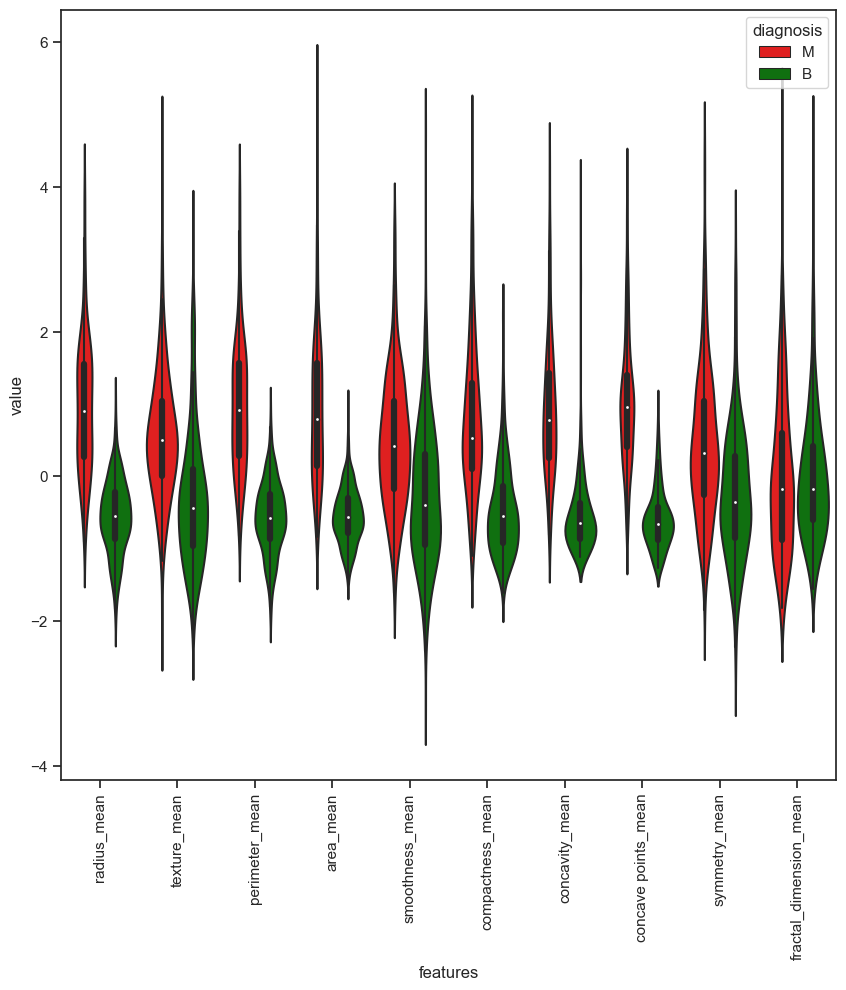

In [29]:
# Violinplot for mean data

plt.figure(figsize=(10,10))
sns.violinplot(x ="features", y ="value", hue ="diagnosis", data = mean_breast_cancer, palette = colors)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

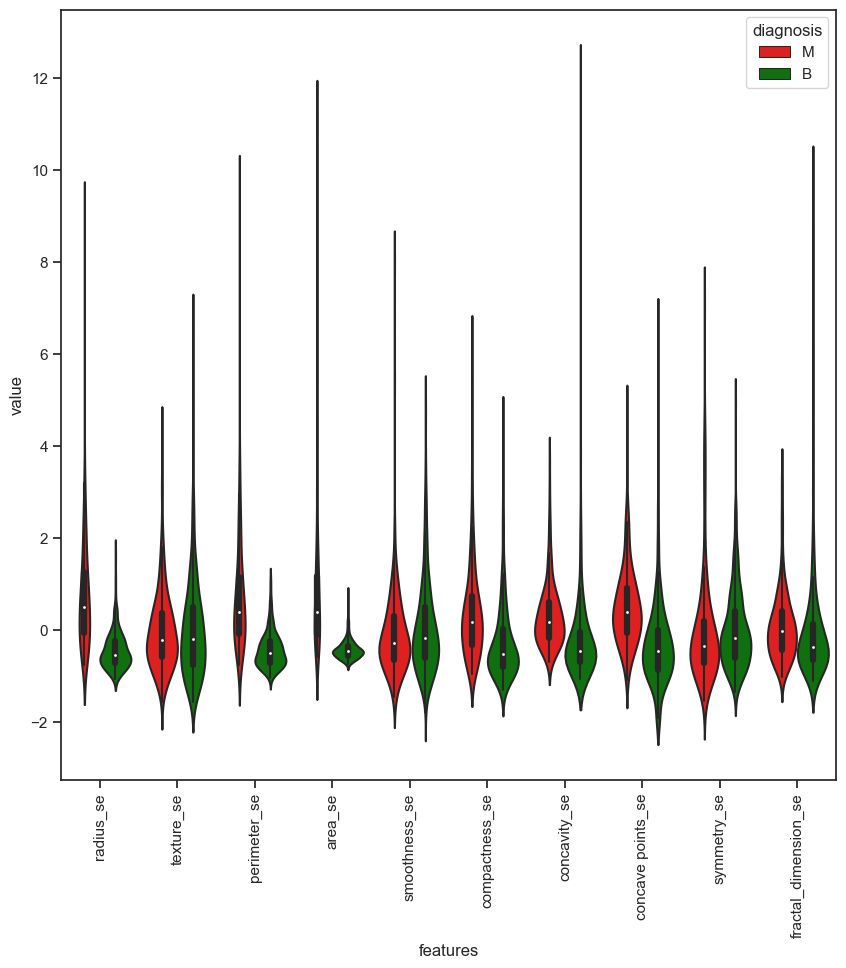

In [30]:
# Violinplot for se data

plt.figure(figsize=(10,10))
sns.violinplot(x ="features", y ="value", hue ="diagnosis", data = se_breast_cancer, palette = colors)
plt.xticks(rotation=90)

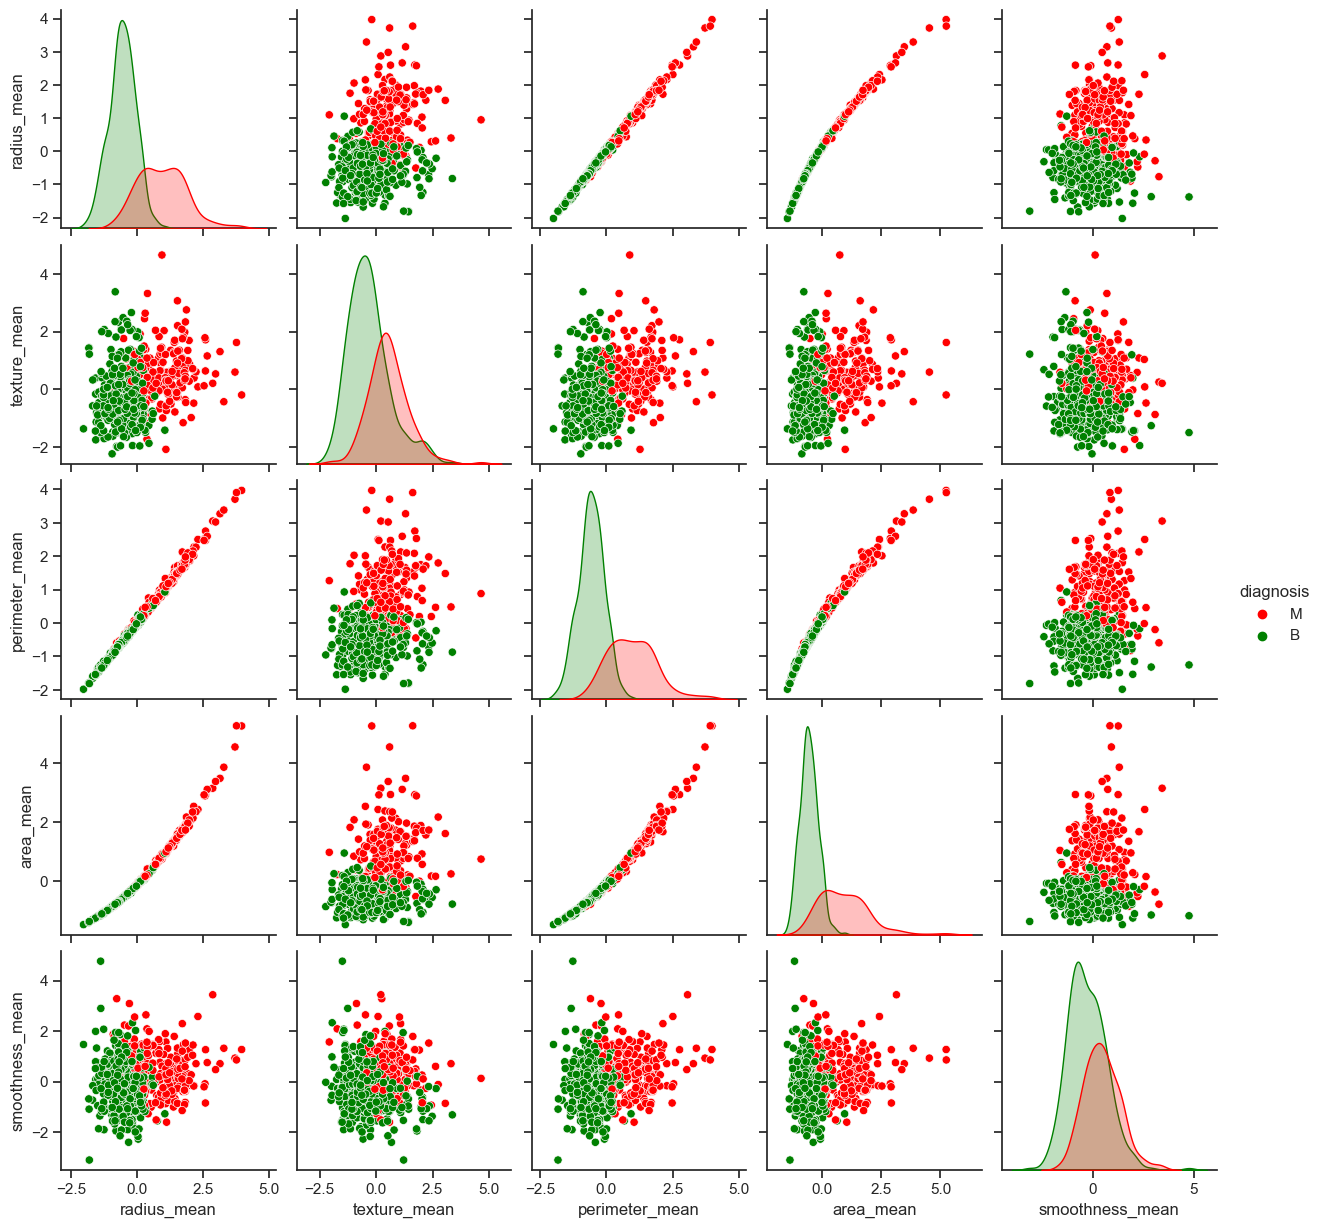

In [31]:
# Pair plot of mean data

mean_data = pd.concat([y,x_.iloc[:,0:5]],axis=1)
sns.pairplot(mean_data, hue = "diagnosis", palette = colors)
plt.show()

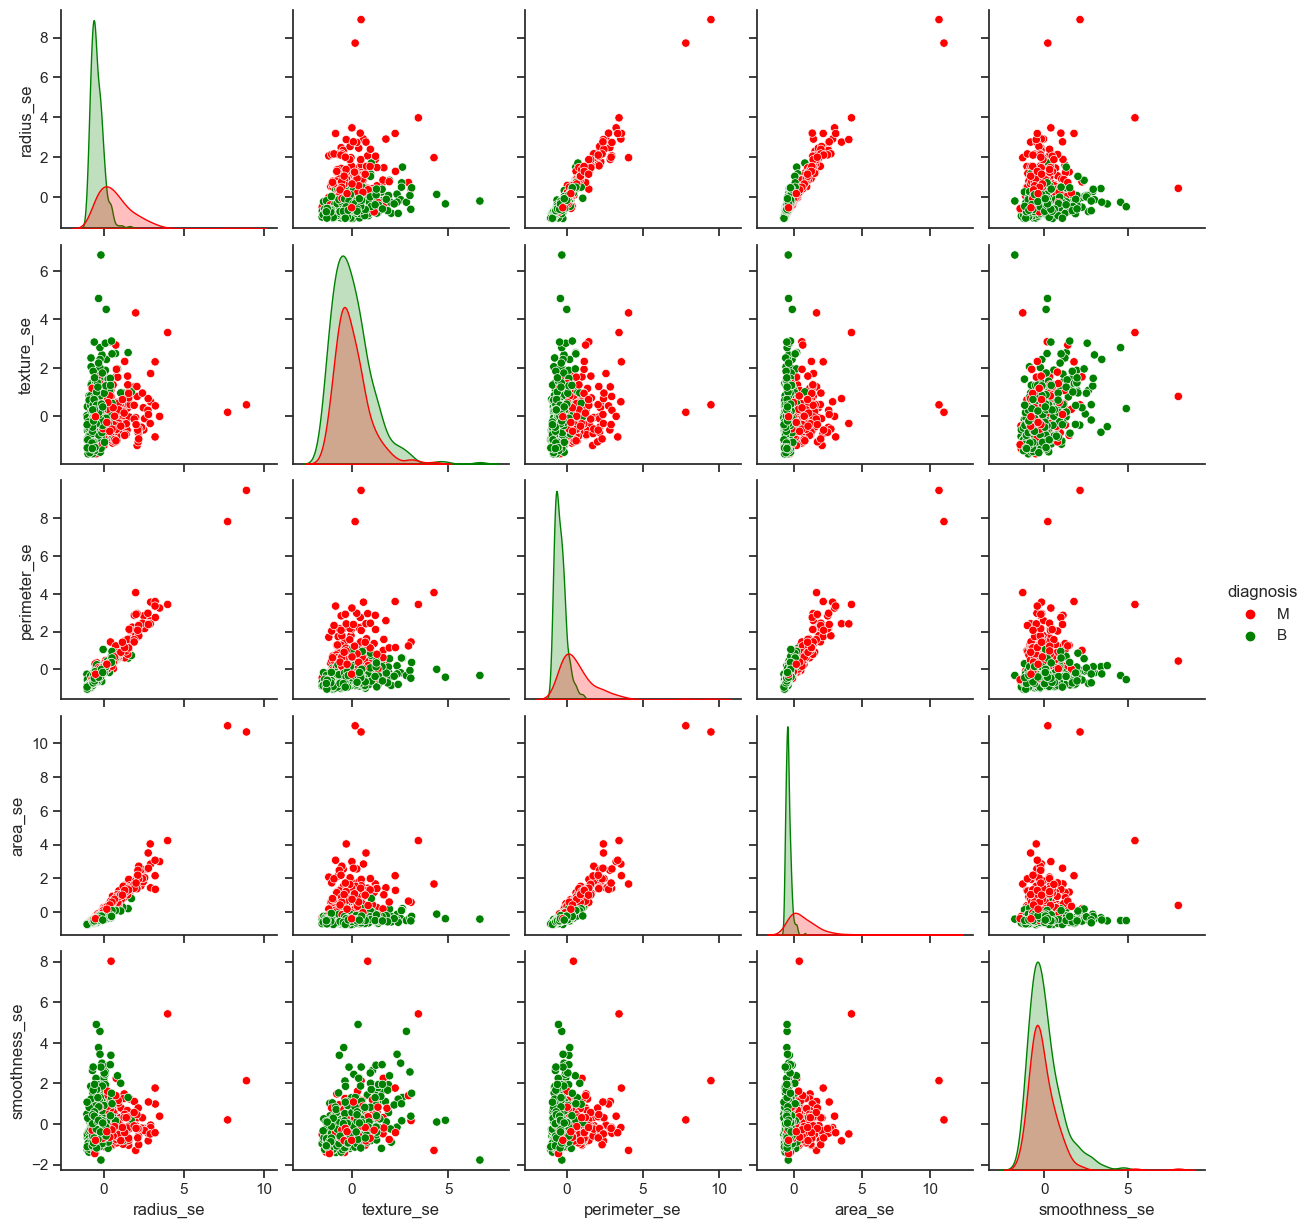

In [32]:
# Pair plot of se data

se_data = pd.concat([y,x_.iloc[:,10:15]],axis=1)
sns.pairplot(se_data, hue = "diagnosis", palette = colors)
plt.show()

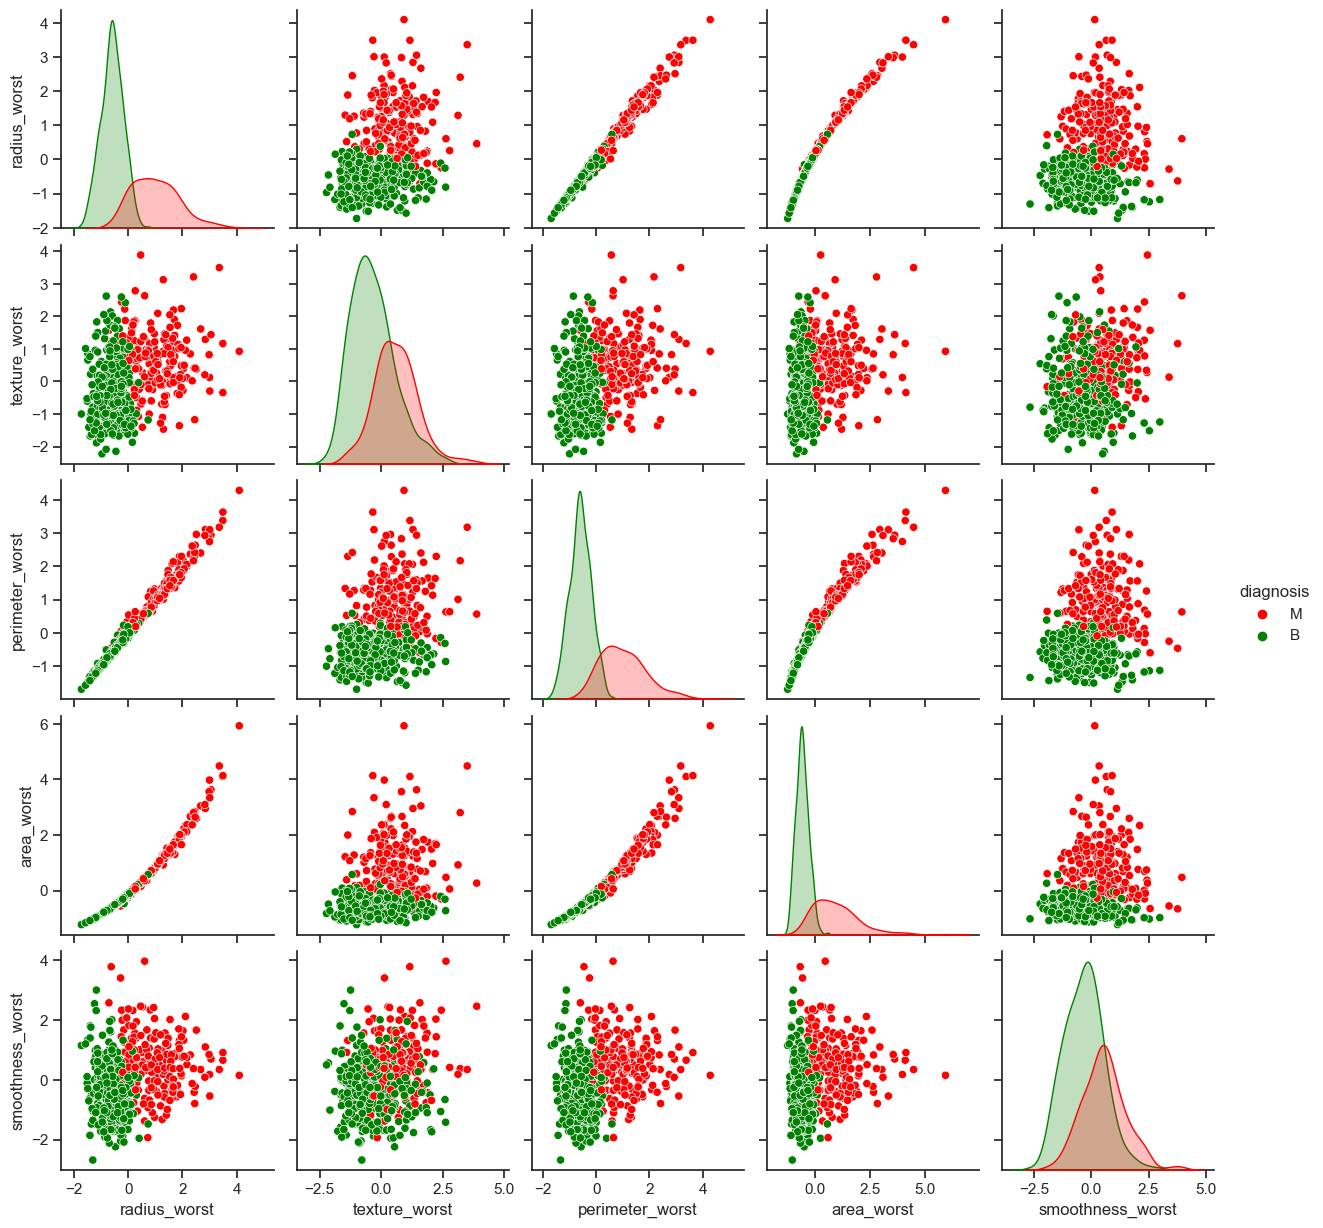

In [33]:
# Pair plot of worst data

worst_data = pd.concat([y,x_.iloc[:,20:25]],axis=1)
sns.pairplot(worst_data, hue = "diagnosis", palette = colors)
plt.show()# Pair plot of worst data

In [34]:
# Principla Component Analysis

# Separate the features and target variable
X = data.iloc[:, 2:]
y = data.iloc[:, 1]

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create an instance of PCA
pca = PCA(n_components=2)

# Fit the PCA instance to the standardized data
X_pca = pca.fit_transform(X_std)

# Create a new dataframe with the transformed data and target variable
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['diagnosis'] = y

# Calculate percentage of total variance explained by first two components
print(f"Explained variance ratio (first two components): {pca.explained_variance_ratio_.sum()*100:.2f}%")

# Perform KMeans clustering on the transformed data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Add the cluster labels to the dataframe
df_pca['cluster'] = kmeans.labels_

# Print the counts of each cluster
print(df_pca['cluster'].value_counts())

Explained variance ratio (first two components): 62.18%
0    378
1    191
Name: cluster, dtype: int64


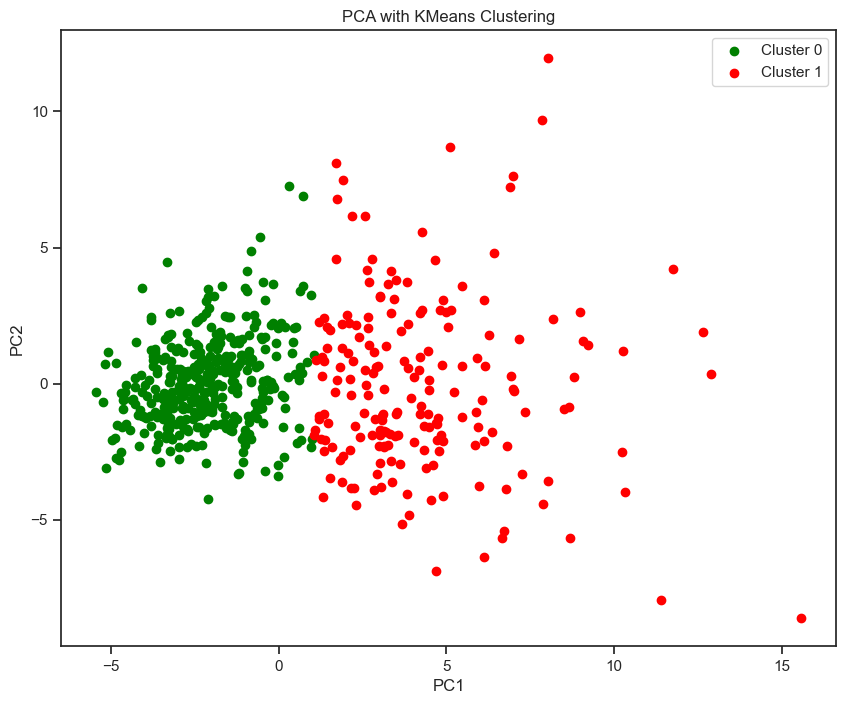

In [35]:
# Displaying PCA

# Define the colors for the clusters
colors = ['green', 'red']

# Create a scatter plot of the first two principal components
fig, ax = plt.subplots(figsize=(10, 8))
for i, cluster in df_pca.groupby('cluster'):
    ax.scatter(cluster['PC1'], cluster['PC2'], c=colors[i], label=f'Cluster {i}')
    
# Set the plot title and axis labels
ax.set_title('PCA with KMeans Clustering')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Add a legend
ax.legend()

# Display the plot
plt.show()

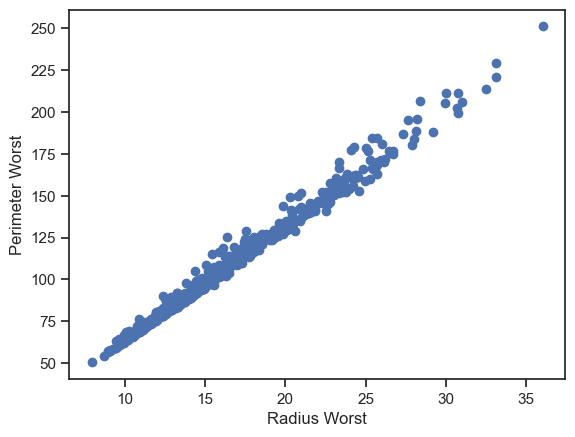

In [40]:
# Relationship between features

plt.scatter(data['radius_worst'], data['perimeter_worst'])
plt.xlabel('Radius Worst')
plt.ylabel('Perimeter Worst')
plt.show()

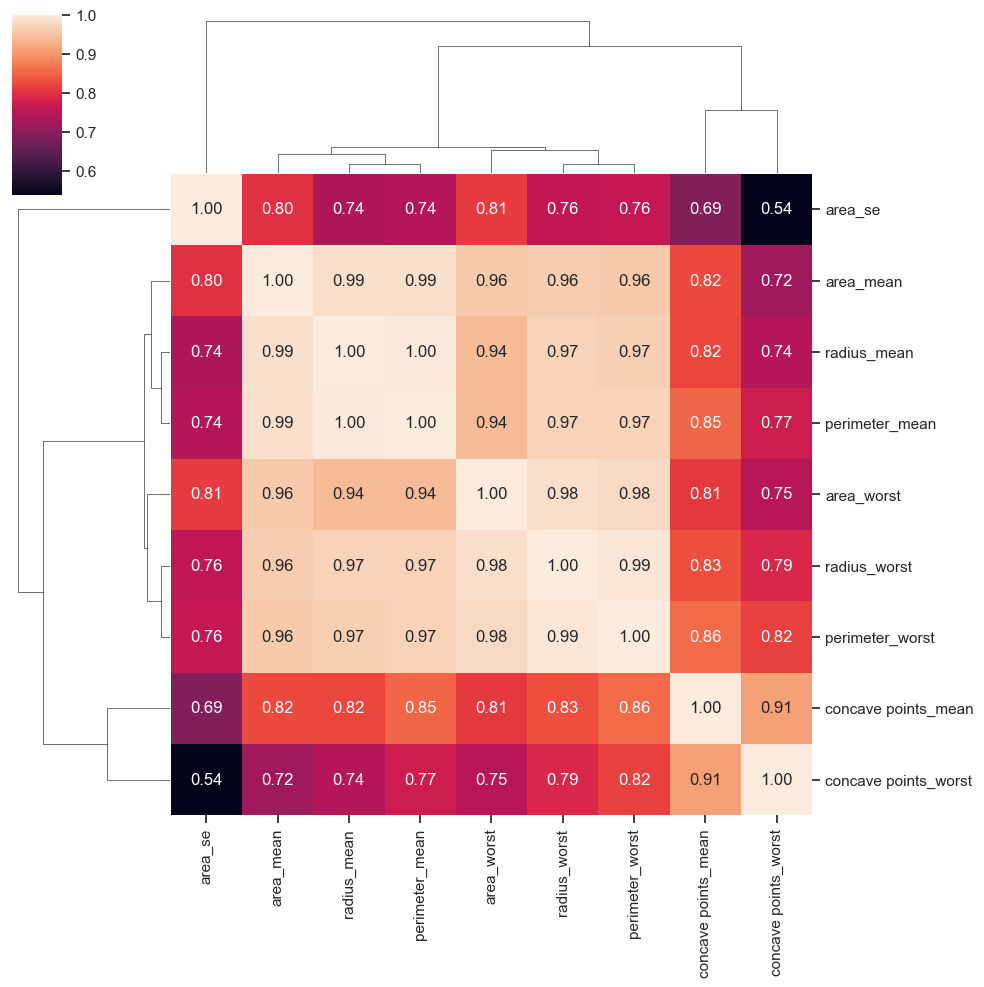

In [41]:
# Viewing highly correlated features of 0.7

corr_matrix=data.corr()
threshold=0.7
filtre = np.abs(corr_matrix.iloc[:,0]) > threshold
corr_features=corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(),annot=True,fmt=".2f")

# Data Modelling

In [36]:
# Encode the diagnosis column (M=1, B=0)
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

In [37]:
# Check the head

data.head(3)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38           122.8     1001.0   
1          1        20.57         17.77           132.9     1326.0   
2          1        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33            184.6   
1         0.1812  ...         24.99          23.41            158.8   
2         0.2069  ...         23.57          25.53            152.5   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  

[3 rows x 31 columns]

In [38]:
# Checking for correlation
# Also note the correlation with diagnosis (After encoding)
data.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

# Model Performance After Removing Outliers

In [39]:
# Removing outliers using the IQR Method

from collections import Counter
def outliers(data,columns):
    outlier_indexes=[] # Create an empty list to store the indices of the outliers
    for i in columns:
        Q1 = data[i].quantile(0.25)  # Calculate the first quartile of the current column
        Q3 = data[i].quantile(0.75)  # Calculate the third quartile of the current column
        IQR = Q3 -Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        filter = ((data[i] < lower_limit) | (data[i] > upper_limit)) # Create a filter to detect values outside the limits
        outlier_observations = data[i][filter]
        outlier_indices = outlier_observations.index
        outlier_indexes.extend(outlier_indices)
        
    outlier_indexes = Counter(outlier_indexes) #finds unique values and converts them into a dictionary
    common_indices = [i for i,v in outlier_indexes.items() if v>2] #if there are more than two outliers at the same time, takes it for a row


    return common_indices

In [40]:
# Deleting the outliers

delete_index = outliers(data,data.columns)
data_new = data.drop(delete_index,axis=0).reset_index(drop=True)

In [41]:
# Checking the shape after removing Outliers and ID column
data_new.shape

(486, 31)

In [42]:
# splitting the target variable (diagnosis) from the features

y = data_new.diagnosis.values.reshape(-1,1)
x = data_new.drop(["diagnosis"], axis = 1)

In [43]:
# Splitting the dataset for training and testing

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [44]:
# Standard Scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [45]:
# 5 Models 
# random state = 42 to ensure same outcome each time
classifier = [DecisionTreeClassifier(random_state = 42),
             SVC(random_state = 42),
             RandomForestClassifier(random_state = 42),
             LogisticRegression(random_state = 42),
             KNeighborsClassifier()]

In [53]:
# Grid searching hyperparameters to get and use the best performing hyperparameters 

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

In [54]:
# Hyperparameters and their respective values that will be used in the grid search.

classifier_params = [dt_param_grid,
                    svc_param_grid,
                    rf_param_grid,
                    logreg_param_grid,
                    knn_param_grid]

In [223]:
# # Save the best estimators and cross-validation results to a file

# with open("tuned_models.pickle", "wb") as f:
#     pickle.dump((best_estimators, cv_results), f)

In [46]:
import pickle
# Load the best estimators and cross-validation results from the saved file

with open("tuned_models.pickle", "rb") as f:
    best_estimators, cv_results = pickle.load(f)
        

In [47]:
# Display the accuracy of the best estimator(s)
    
for estimator, cv_result in zip(best_estimators, cv_results):
    print(f"{estimator.__class__.__name__} train accuracy: {cv_result:.4f}")

DecisionTreeClassifier train accuracy: 0.9435
SVC train accuracy: 0.9846
RandomForestClassifier train accuracy: 0.9691
LogisticRegression train accuracy: 0.9743
KNeighborsClassifier train accuracy: 0.9666


In [59]:
# Dataframe of result
data_models = pd.DataFrame({"Cross Validation":cv_results,
                  "ML Models":["DT", "SVM", "RF", "LR", "KN"]})


<Axes: xlabel='Cross Validation', ylabel='ML Models'>

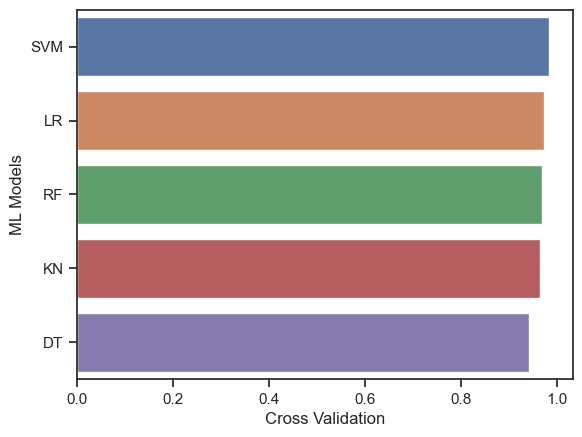

In [60]:
# Visualization of result

sns.barplot(x = "Cross Validation", y = "ML Models", data = data_models.sort_values(["Cross Validation"], ascending = False))

In [63]:
# SVM Accuracy Score (Using best grid parameters) - Outliers Removed

grid = {"kernel": ["rbf"],
            "gamma": [0.001],
            "C": [100]}
svm = SVC(random_state=42)
svm_cv = GridSearchCV(svm, grid, cv=10, scoring="accuracy") 
model = svm_cv.fit(x_train, y_train)
print("train accuracy:", format(model.best_score_, '.4f'))

y_svm = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_svm)
print("test accuracy:", format(test_accuracy, '.4f'))

train accuracy: 0.9846
test accuracy: 0.9796


<Axes: >

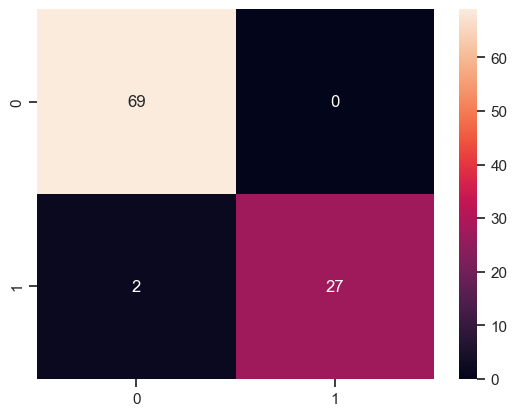

In [64]:
# svm confusion matrix - Outliers Removed

svm_cm = confusion_matrix(y_test, y_svm)
sns.heatmap(svm_cm, annot=True)

In [66]:
from sklearn.metrics import classification_report

# svm classification report - Outliers Removed
print(classification_report(y_test, y_svm))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        69
           1       1.00      0.93      0.96        29

    accuracy                           0.98        98
   macro avg       0.99      0.97      0.98        98
weighted avg       0.98      0.98      0.98        98



In [67]:
# Logistic Regression Accuracy Score (Using best grid parameters) - Outliers Removed

grid_lr = {"C": np.logspace(start=0.1, stop=1, num=10, base=10)}
lr = LogisticRegression(random_state=42)

lr_cv = GridSearchCV(lr, grid_lr, cv=10, scoring="accuracy")
model_lr = lr_cv.fit(x_train, y_train)
print("train accuracy: {:.4f}".format(model_lr.best_score_))
y_lr = model_lr.predict(x_test)
print("test accuracy: {:.4f}".format(accuracy_score(y_test, y_lr)))

train accuracy: 0.9769
test accuracy: 0.9694


<Axes: >

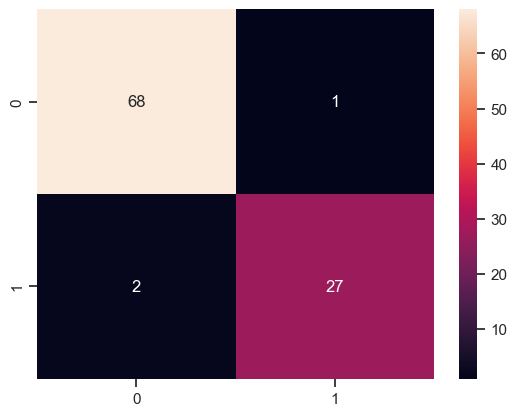

In [68]:
# LR confusion matrix - Outliers Removed

lr_cm = confusion_matrix(y_test, y_lr)
sns.heatmap(lr_cm, annot=True)

In [69]:
#  LR Classification Report - Outliers Removed

print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        69
           1       0.96      0.93      0.95        29

    accuracy                           0.97        98
   macro avg       0.97      0.96      0.96        98
weighted avg       0.97      0.97      0.97        98



In [71]:
# Random Forest Accuracy Score - Outliers Removed

grid_rf = {"max_features": [10],
               "min_samples_split": [3],
               # "min_samples_leaf": [1, 3, 10],
               "bootstrap": [False],
               # "n_estimators": [100, 300],
               "criterion": ["gini"]}

rf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf, grid_rf, cv=10, scoring="accuracy")
model_rf = rf_cv.fit(x_train, y_train)
print("train accuracy: {:.4f}".format(model_rf.best_score_))

y_rf = model_rf.predict(x_test)
print("test accuracy:{:.4f}".format(accuracy_score(y_test, y_rf)))

train accuracy: 0.9691
test accuracy:0.9694


<Axes: >

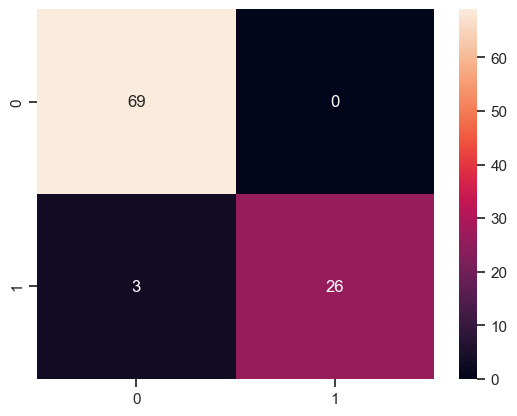

In [72]:
# RF confusion matrix - Outliers Removed

rf_cm = confusion_matrix(y_test, y_rf)
sns.heatmap(rf_cm, annot=True)

In [73]:
# RF Classification Report - Outliers Removed

print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.90      0.95        29

    accuracy                           0.97        98
   macro avg       0.98      0.95      0.96        98
weighted avg       0.97      0.97      0.97        98



In [74]:
# KNN Accuracy Score - Outliers Removed
    
grid_knn = {"n_neighbors": np.linspace(start=1, stop=9, num=9, dtype=int).tolist(),
                "weights": ["uniform", "distance"],
                "metric": ["euclidean"]}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid_knn, cv=10, scoring="accuracy")
model_knn = knn_cv.fit(x_train, y_train)
print("train accuracy: {:.4f}" .format(model_knn.best_score_))

y_knn = model_knn.predict(x_test)
print("test accuracy:{:.4f}". format(accuracy_score(y_test, y_knn)))

train accuracy: 0.9666
test accuracy:0.9490


<Axes: >

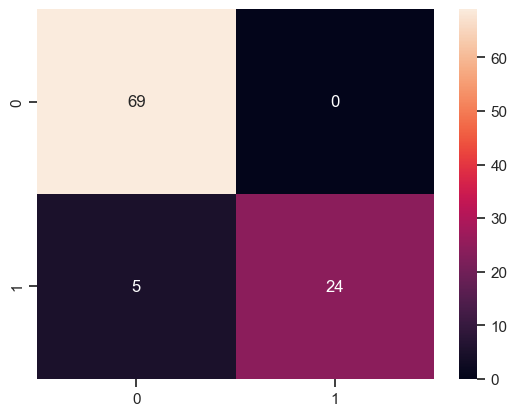

In [75]:
# KNeighborsClassifier confusion matrix - Outliers Removed

knn_cm = confusion_matrix(y_test, y_knn)
sns.heatmap(knn_cm, annot=True)

In [76]:
# KNN Clasification Report - Outliers Removed

print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        69
           1       1.00      0.83      0.91        29

    accuracy                           0.95        98
   macro avg       0.97      0.91      0.94        98
weighted avg       0.95      0.95      0.95        98



In [77]:
# Decision Tree Accuracy Score - Outliers Removed

grid_dt = {"max_depth": [9], "min_samples_split": [10]}

dt = DecisionTreeClassifier(random_state=42)
dt_cv = GridSearchCV(dt, grid_dt, cv=10, scoring="accuracy")
model_dt = dt_cv.fit(x_train, y_train)
print("train accuracy: {:.4f}" .format(model_dt.best_score_))

y_dt = model_dt.predict(x_test)
print("test accuracy:{:.4f}".format(accuracy_score(y_test, y_dt)))

train accuracy: 0.9435
test accuracy:0.9388


<Axes: >

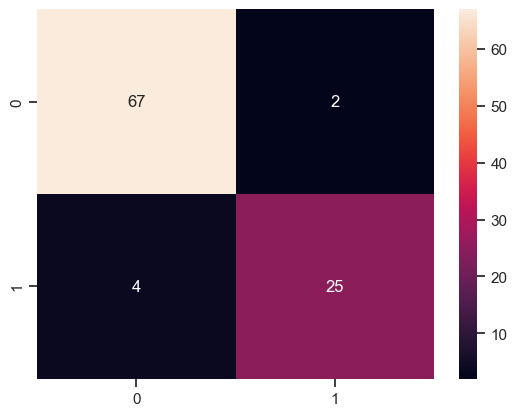

In [78]:
# Decision Tree Confusion Matrix - Outliers Removed

dt_cm = confusion_matrix(y_test, y_dt)
sns.heatmap(dt_cm, annot=True)

In [79]:
# Decision Tree Classification Report - Outliers Removed

print(classification_report(y_test, y_dt))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        69
           1       0.93      0.86      0.89        29

    accuracy                           0.94        98
   macro avg       0.93      0.92      0.93        98
weighted avg       0.94      0.94      0.94        98



# Model Performance Using Optimal Number of Features 

In [116]:
import xgboost as  xgb
import joblib

In [117]:
# XGBoost Classifier

model_all = xgb.XGBClassifier()

In [118]:
# Creating matrix X for features and the target vector y

y = data['diagnosis']
X = data[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean',
        'concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se',
        'compactness_se','concavity_se','concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

<Axes: >

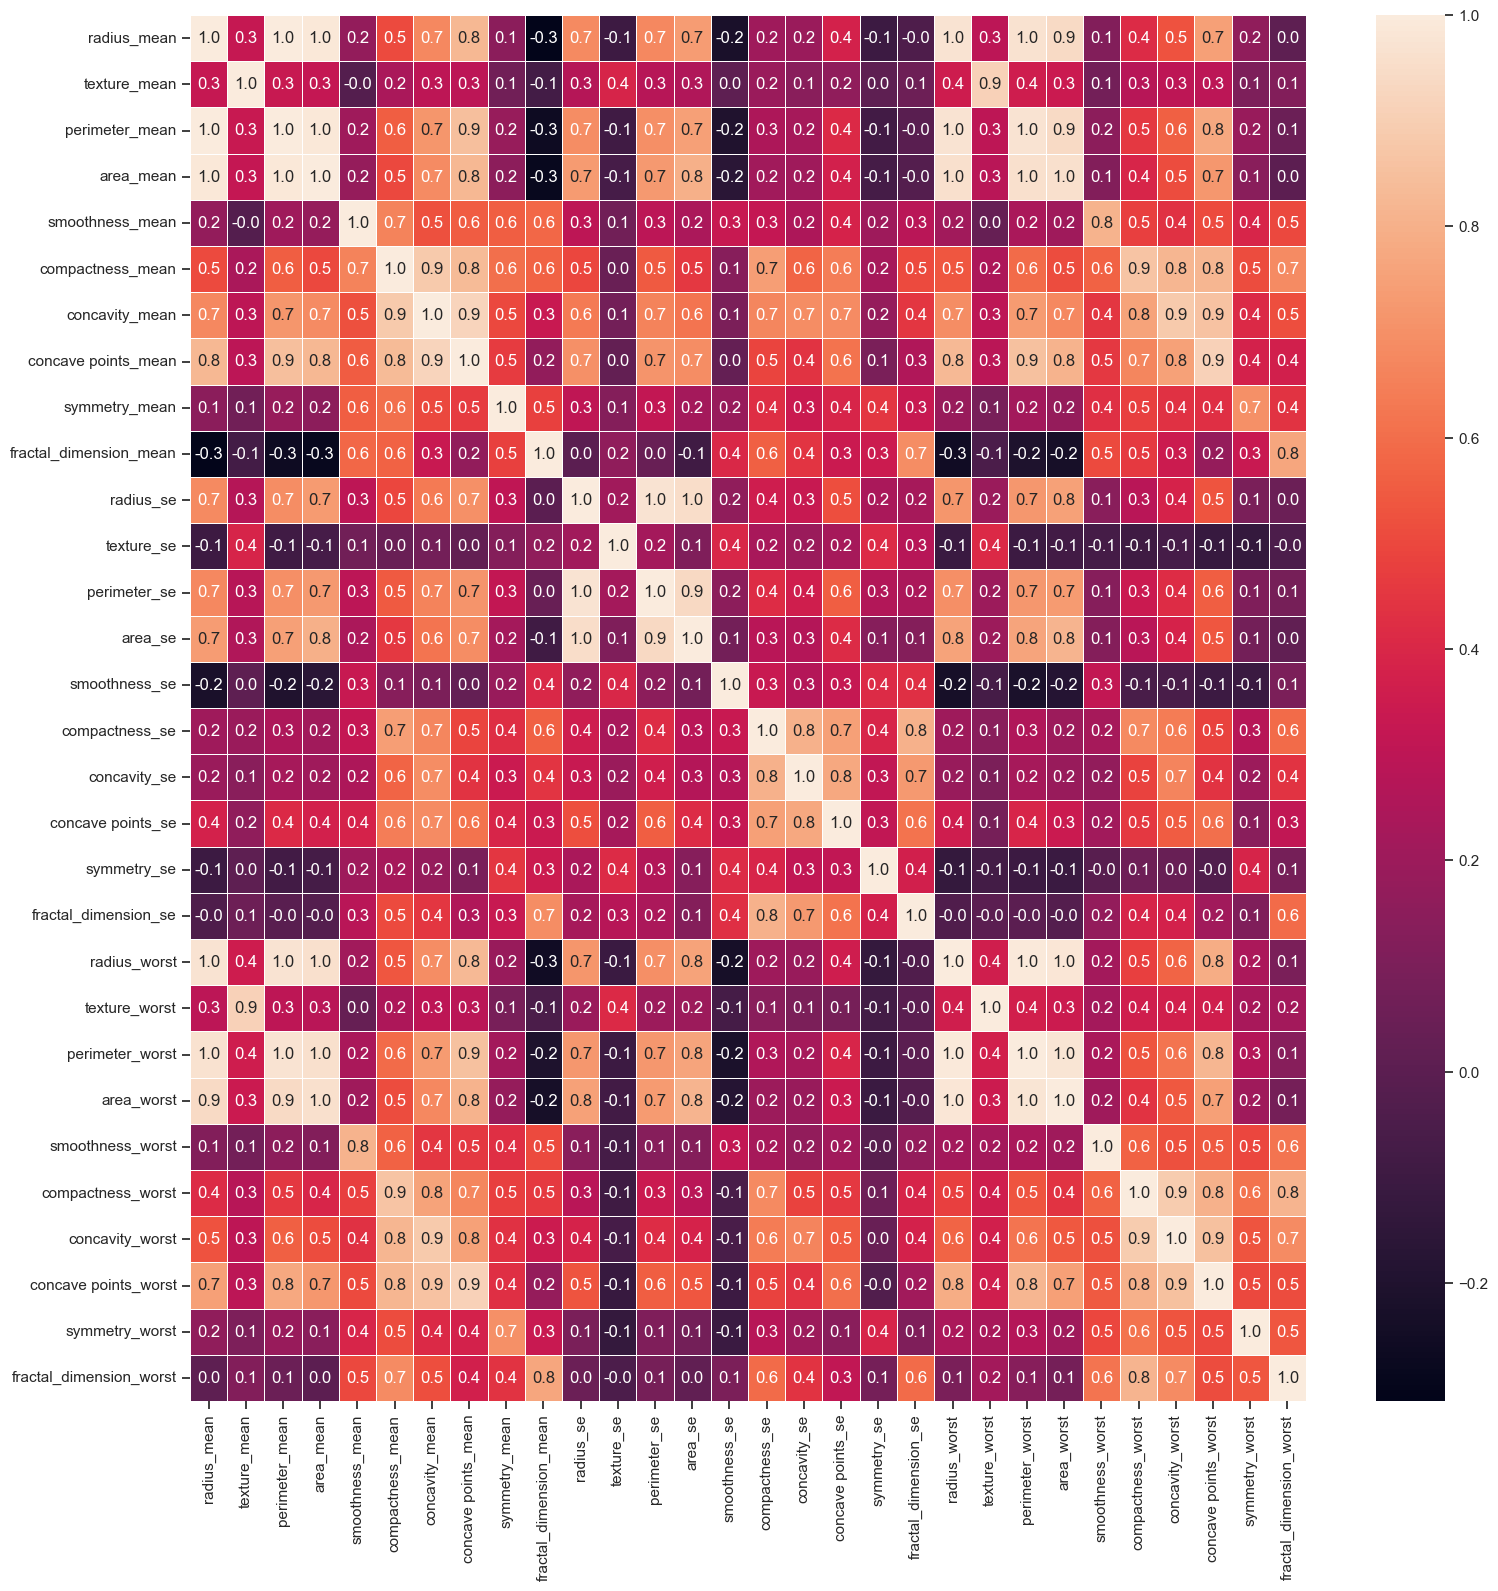

In [135]:
# Correlation map
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

In [119]:
# The features with high correlation with other features are: (threshold = 90%)

high_corr_pts = X[['radius_mean','perimeter_mean','area_mean','radius_worst','perimeter_worst']]

In [120]:
# Splitting of data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [96]:
# Creating and fitting the XGBoost model
# model_all = xgb.XGBClassifier(gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200)
# model_all.fit(X_train, y_train)

# # Saving the model
# joblib.dump(model_all, 'xgb_model.pkl')

['xgb_model.pkl']

In [121]:
# Loading the saved model
model_all = joblib.load('xgb_model.pkl')

# Set the random state parameter
model_all.set_params(random_state=42)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [122]:
# XGBoost Accuracy Score (All features)

# Predicting output labels for X_train
train_pred = model_all.predict(X_train)

# Comparing predicted labels with actual labels for X_train
train_accuracy = accuracy_score(y_train, train_pred)

# Printing the train accuracy score
print("Train Accuracy Score:", round(train_accuracy, 4))

# Predicting output labels for X_test
test_pred = model_all.predict(X_test)

# Calculating test accuracy score
test_accuracy = accuracy_score(y_test, test_pred)

# Printing the test accuracy score
print("Test Accuracy Score:", round(test_accuracy, 4))

Train Accuracy Score: 0.989
Test Accuracy Score: 1.0


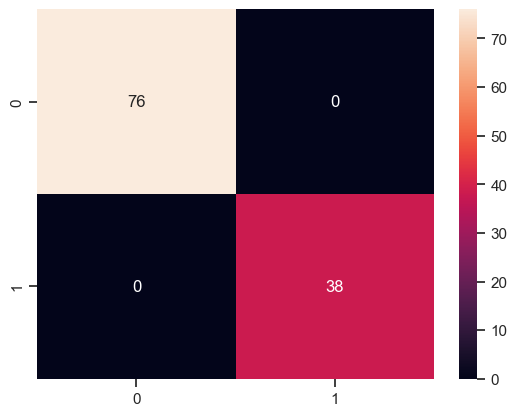

In [123]:
# XGBoost Confusion matrix (All features)

# Confusion matrix heatmap
xg_cm = confusion_matrix(y_test, test_pred)
sns.heatmap(xg_cm, annot=True, fmt="d")
plt.show()

In [124]:
# Classification Report for XGBoost-All features

print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        38

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



# Finding the optimal features

In [125]:
# Optimal Features

from sklearn.feature_selection import RFECV

# The 'accuracy' scoring is proportional to the number of correct classification
clf = xgb.XGBClassifier()
rfecv = RFECV(estimator=clf, step=1, cv=4, scoring='accuracy') # 5 fold cross validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 23
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')


In [126]:
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()

In [127]:
# Fitting the rfecv score
rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(n_splits=5))
rfecv.fit(X_train, y_train)


RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression())

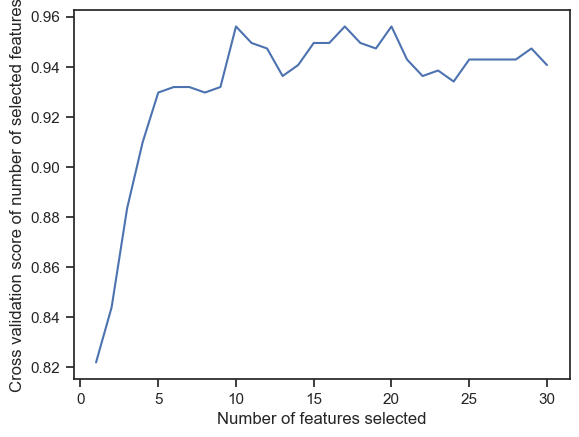

In [128]:
# 23 optimal features are selected
# We proceed to plot the number of features vs cross validation scores to see how it ffects the prediction:

plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.show()

In [129]:
# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features
importance = (model_all.feature_importances_)
indices = np.argsort(importance)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))

Feature ranking:
1. feature 22 (0.532753)
2. feature 27 (0.103544)
3. feature 20 (0.057291)
4. feature 17 (0.035134)
5. feature 7 (0.034588)
6. feature 3 (0.032648)
7. feature 1 (0.022885)
8. feature 6 (0.018478)
9. feature 23 (0.018415)
10. feature 21 (0.017490)
11. feature 2 (0.012692)
12. feature 11 (0.011335)
13. feature 12 (0.010139)
14. feature 10 (0.009670)
15. feature 24 (0.009574)
16. feature 13 (0.008934)
17. feature 26 (0.007889)
18. feature 29 (0.007659)
19. feature 5 (0.006902)
20. feature 4 (0.006628)
21. feature 14 (0.006095)
22. feature 25 (0.005686)
23. feature 18 (0.005273)
24. feature 9 (0.005021)
25. feature 19 (0.004579)
26. feature 15 (0.004124)
27. feature 28 (0.003527)
28. feature 0 (0.001046)
29. feature 8 (0.000000)
30. feature 16 (0.000000)


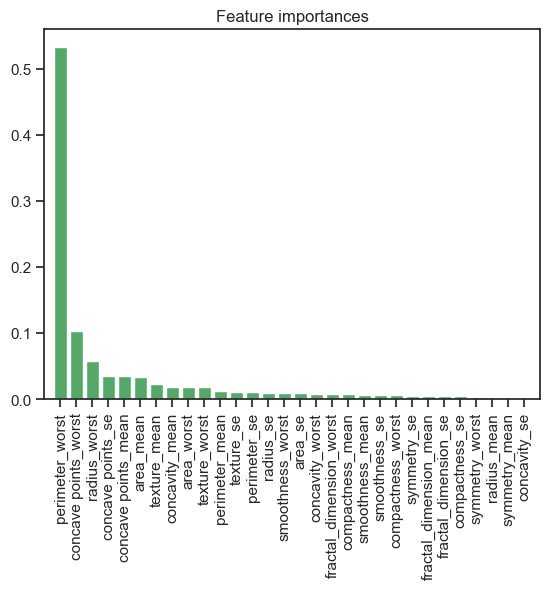

In [130]:
# Plot to rank the features importances
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importance[indices], color="g", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [133]:
# Training and analyzing the model with only the optimal features

X_train_optimal = X_train[[ 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst']]

X_test_optimal = X_test[[ 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst']]

In [134]:
# XGBoost Accuracy Score - Optimal features

# Load classifier in model optimal (considering all optimal features)

model_optimal = xgb.XGBClassifier(gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200)

# Set the random state parameter
model_optimal.set_params(random_state=42)

# Fit model on optimal features
model_optimal.fit(X_train_optimal, y_train)

# Predicting output labels for X_train
pred_train = model_optimal.predict(X_train_optimal)

# Comparing predicted labels with actual labels for X_train
train_accuracy = accuracy_score(y_train, pred_train)

# Printing the train accuracy score
print("Train Accuracy Score:{:.4f}".format(train_accuracy))

# Predicting output labels for X_test
pred_test = model_optimal.predict(X_test_optimal)

# Calculating test accuracy score
test_accuracy = accuracy_score(y_test, pred_test)

# Printing the test accuracy score
print("Test Accuracy Score: {:.4f}".format(test_accuracy))

Train Accuracy Score:1.0000
Test Accuracy Score: 0.9737


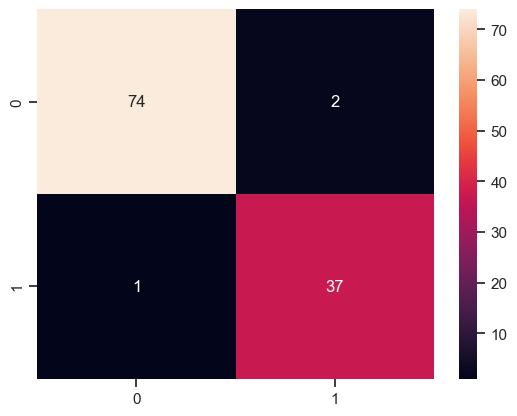

In [136]:
# Confusion matrix heatmap for XGBoost - Optimal features

xgb_cm = confusion_matrix(y_test, pred_test)
sns.heatmap(xgb_cm, annot=True, fmt="d")
plt.show()

In [137]:
# XGBoost Classification Report - Optimal Features

print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.95      0.97      0.96        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Model Performance After Removing Multicollinear Features

In [157]:
# Loading the data
data2 = pd.read_csv('breast-cancer-wisconsin-data.csv') # read in the data

# Drop the ID column
data2.drop('id', axis=1 , inplace=True)

In [158]:
# Encode the diagnosis column (M=1, B=0)
le = LabelEncoder()
data2['diagnosis'] = le.fit_transform(data2['diagnosis'])

In [159]:
mean_data2 = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
                 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
se_data2 = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
           'concave points_se', 'symmetry_se', 'fractal_dimension_se']
worst_data2 = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
              'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst',
              'fractal_dimension_worst']

In [160]:
y = data2.diagnosis
x = data2.drop(columns="diagnosis")
x_ = (x - x.mean()) / x.std()  # standardization to group all similar (se, mean and worst features together)

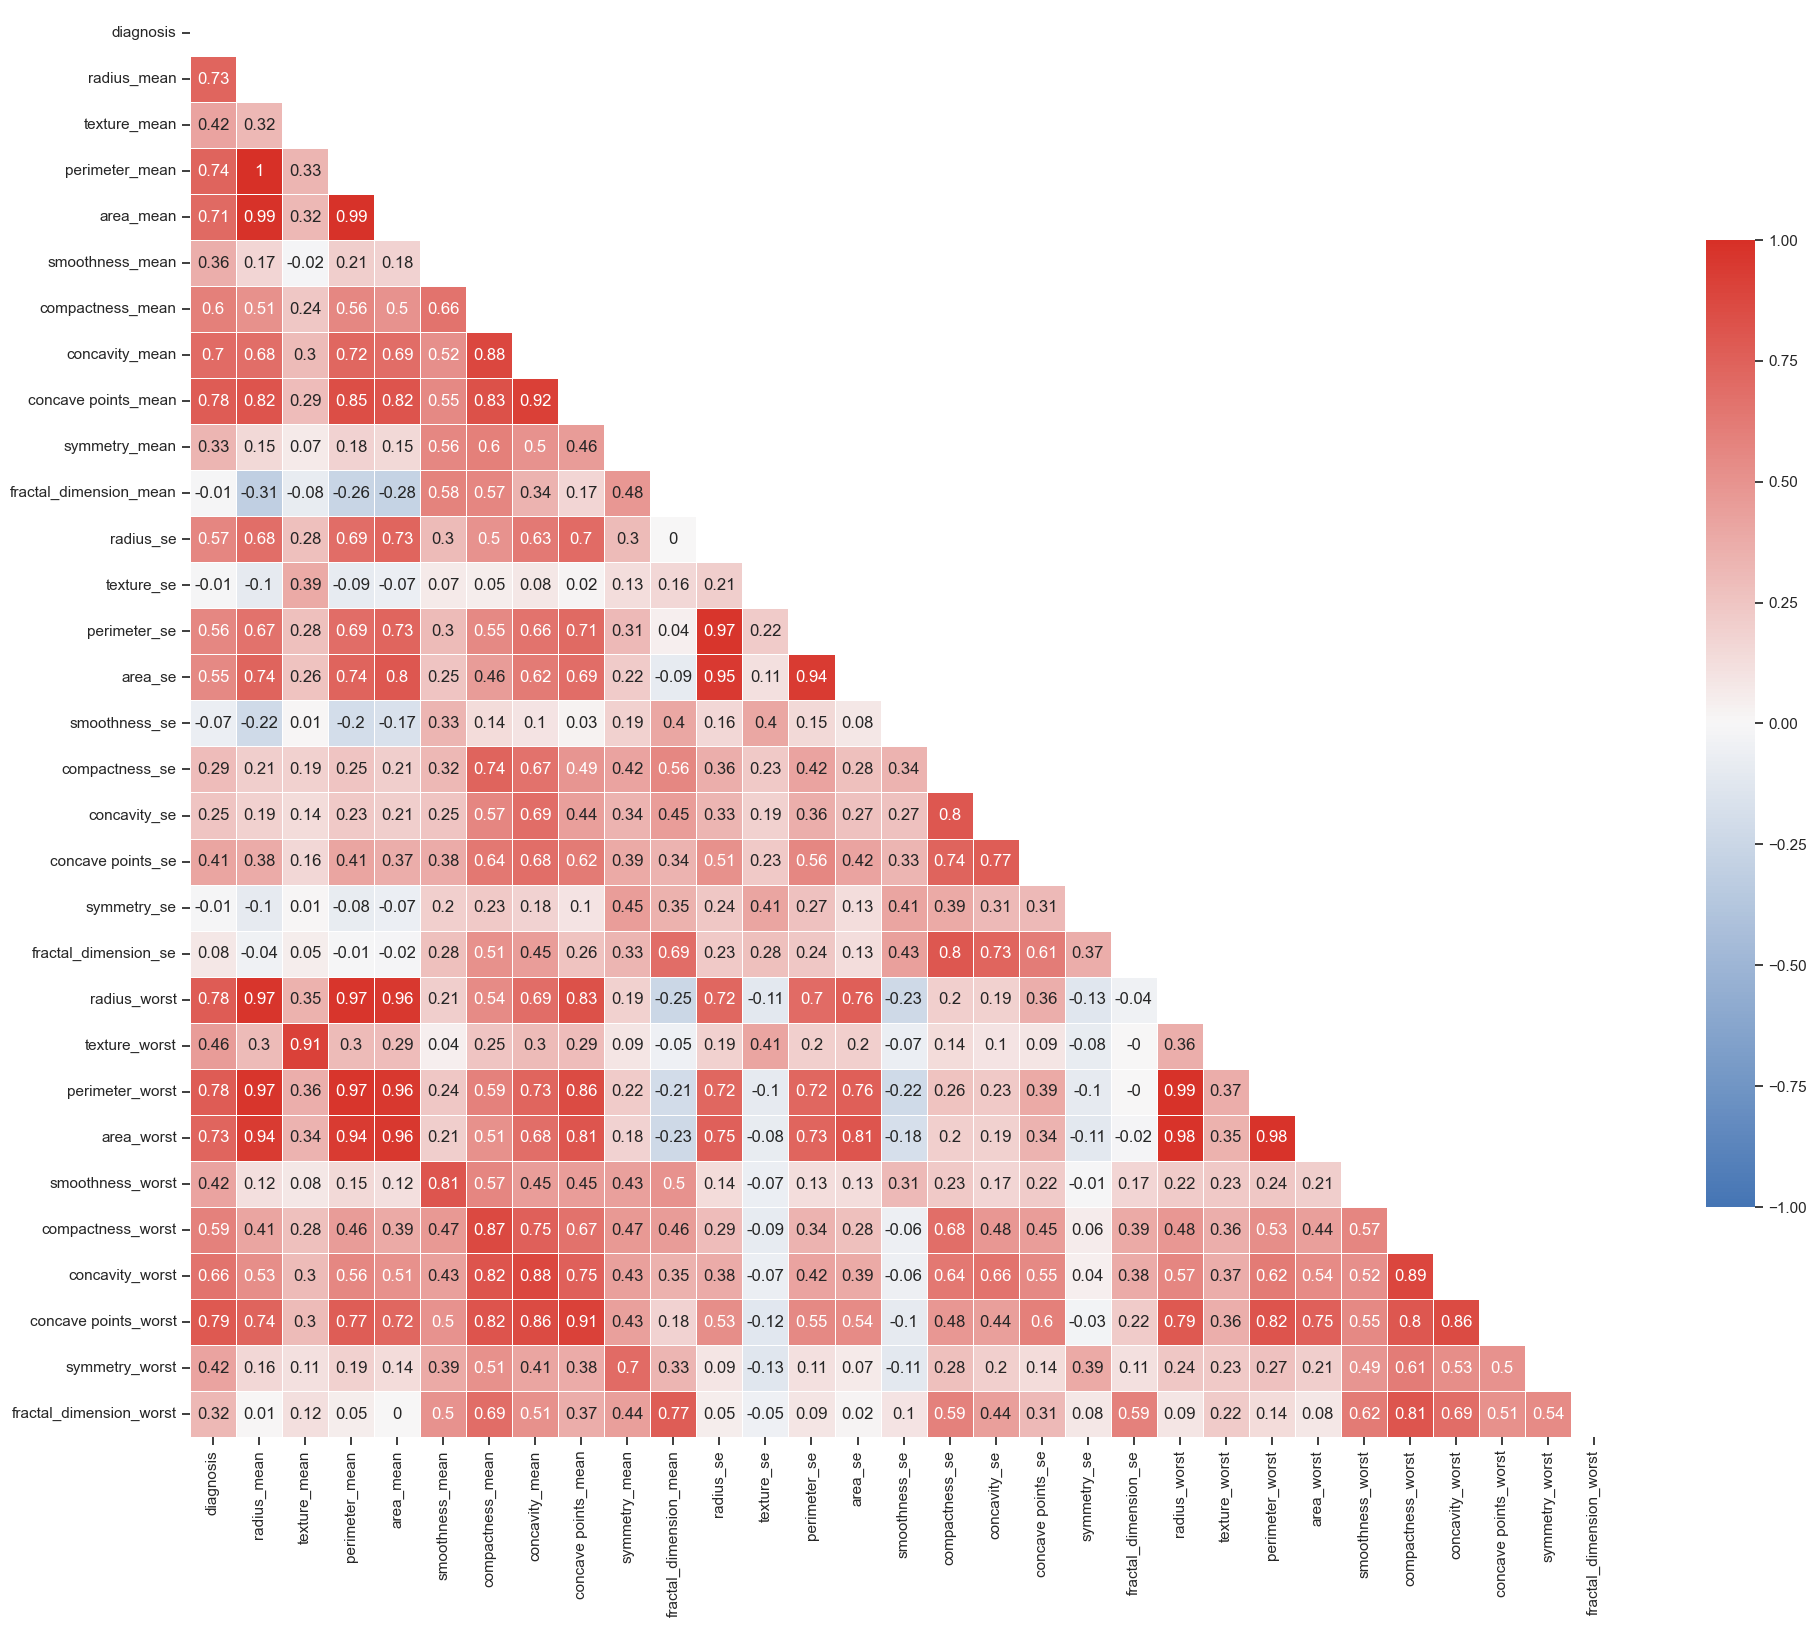

In [161]:
import matplotlib.colors as colors

# Generate and visualize the correlation matrix
corr = data2.corr().round(2)

# Mask the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20,20))

# Define custom colourmap
colors_list = [(0, "#4575b4"), (0.5, "#f7f7f7"), (1, "#d73027")]  # define the colors for the color map
cmap_custom = colors.LinearSegmentedColormap.from_list("CustomMap", colors_list)  # create the custom color map

# Draw the heatmap with the custom color map
sns.heatmap(corr, mask=mask, cmap=cmap_custom, vmin=-1, vmax=1, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": 0.5}, annot=True)

plt.tight_layout()

Based on the map, we can observe the presence of multicollinearity among some features. For instance, the radius mean column displays a strong correlation of 1 and 0.99 with the perimeter mean and area mean columns, respectively. This is due to the fact that they all provide information about the cell's physical size. Therefore, we should only select one of these features for further analysis.

Additionally, there is multicollinearity between the mean columns and worst column. For example, the radius_mean column has a correlation of 0.97 with the radius_worst column.

Moreover, the attributes compactness, concavity, and concave points also exhibit multicollinearity. As a result, we can choose only one of these features. In this case, I have decided to select compactness.


In [162]:
# first, I will drop all the worst columns
data2 = data2.drop(worst_data2, axis=1)

# then all the columns related to the 'perimeter' and 'area' attributes will be dropped
data3 = ['perimeter_mean',
        'perimeter_se',
        'area_mean','area_se']

data2 = data2.drop(data3, axis=1)
# lastly, I will drop all columns related to the concavity and concave_points

data4 = ['concavity_mean',
                'concavity_se',
                'concave points_mean',
                'concave points_se']                
data2 = data2.drop(data4, axis=1)

In [163]:
# check the columns still present
data2.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

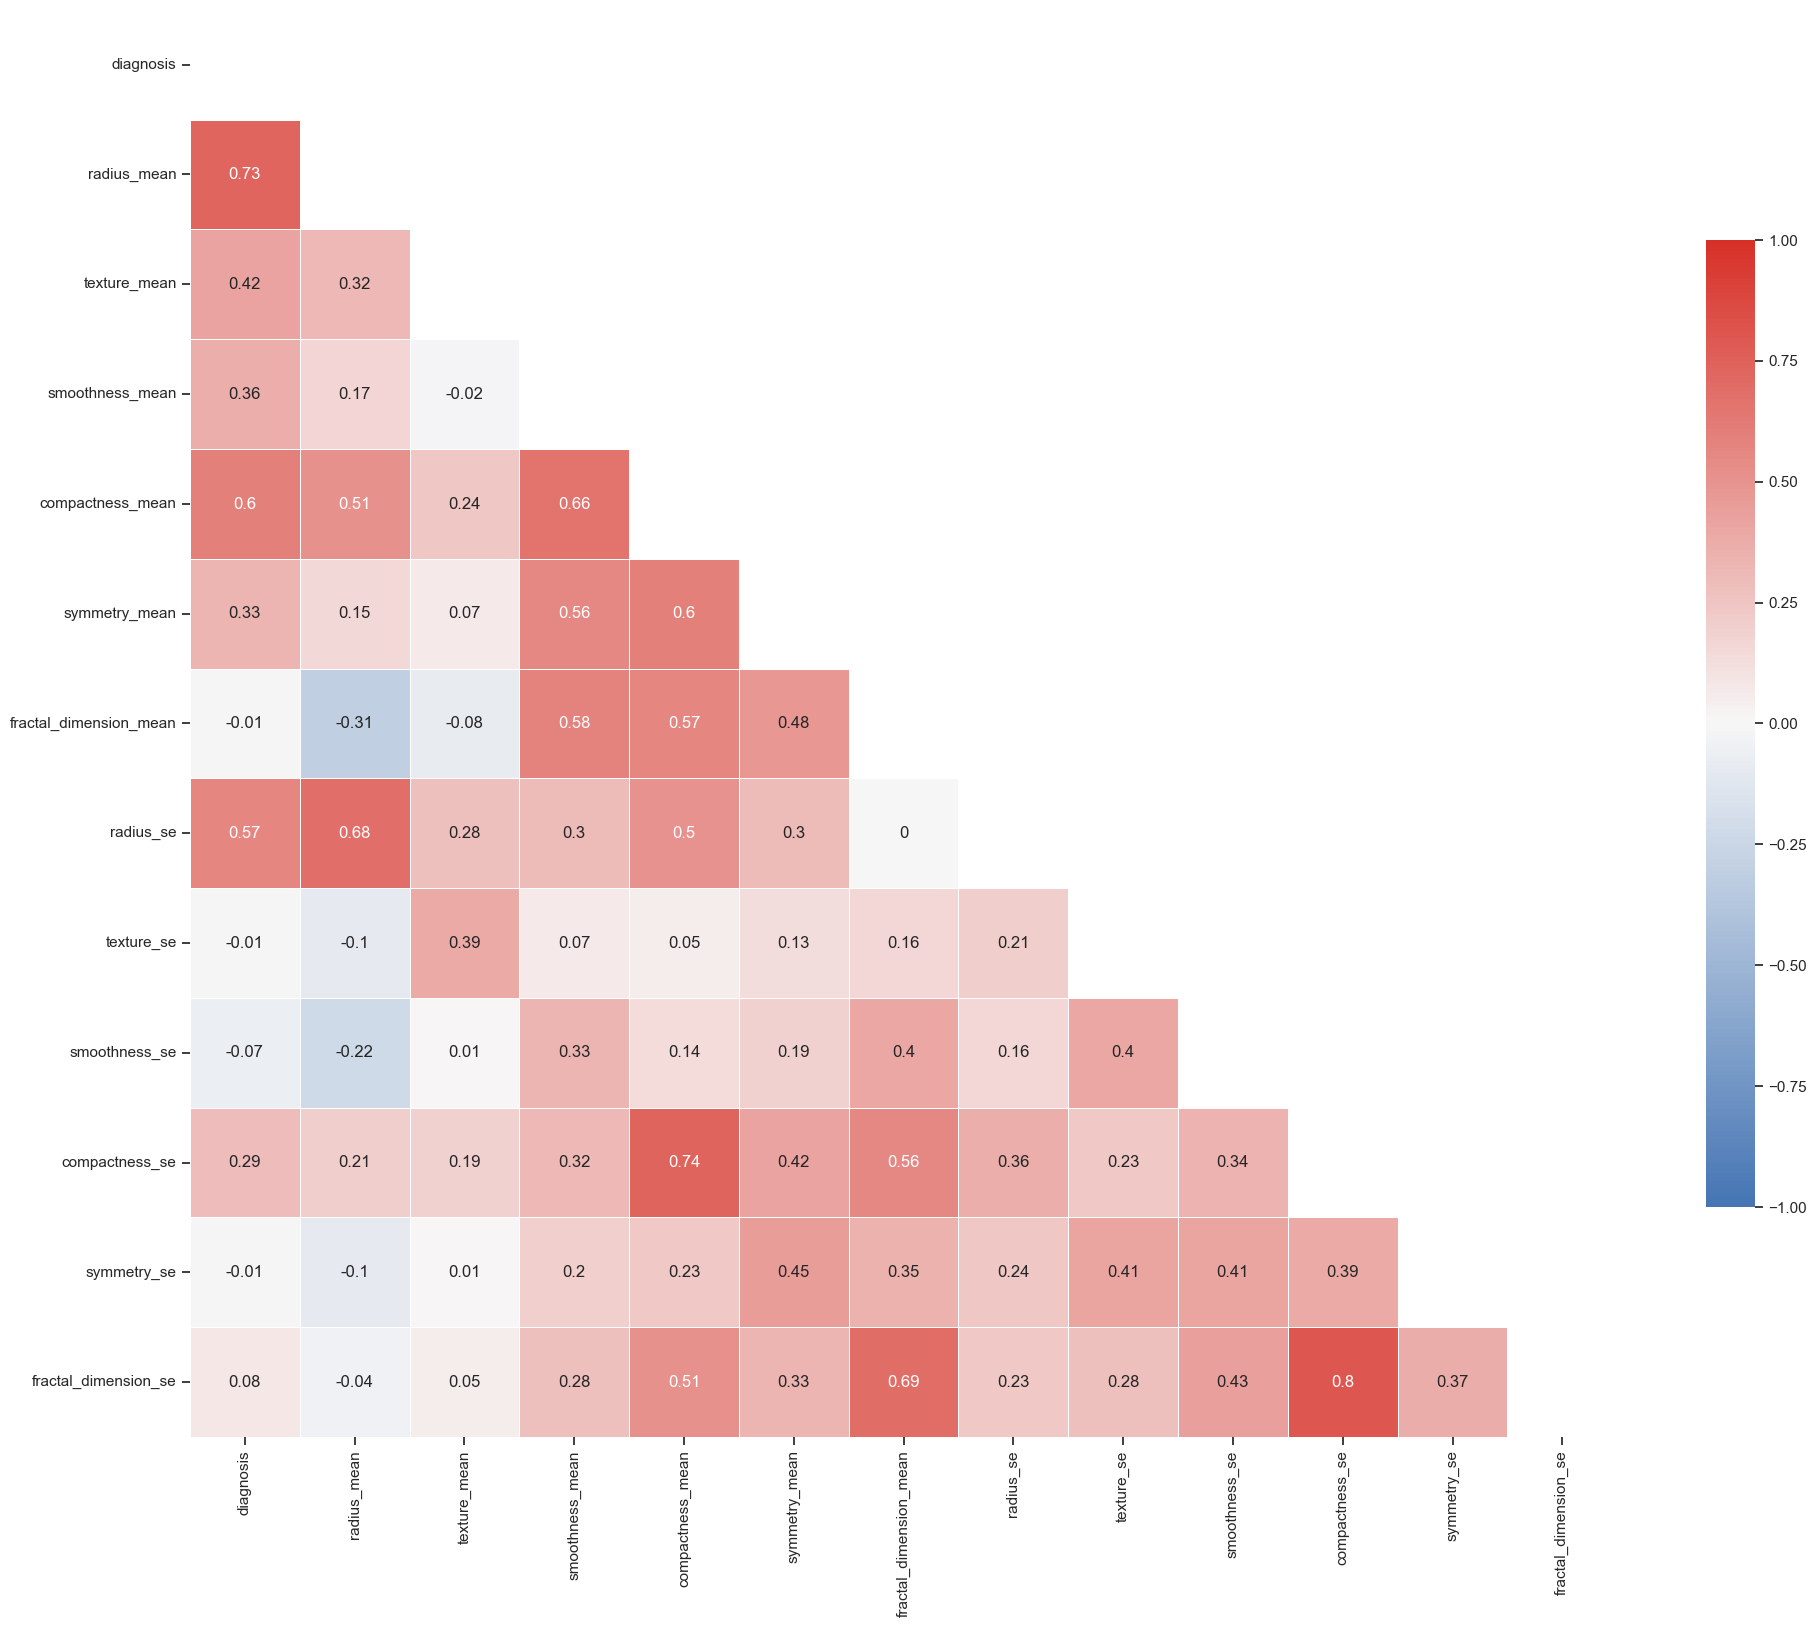

In [165]:
# Redraw the correlation map to check (After removing multi-collinear features)

# Generate and visualize the correlation matrix
corr = data2.corr().round(2)

# Mask the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20,20))

# Define custom colourmap
colors_list = [(0, "#4575b4"), (0.5, "#f7f7f7"), (1, "#d73027")]  # define the colors for the color map
cmap_custom = colors.LinearSegmentedColormap.from_list("CustomMap", colors_list)  # create the custom color map

# Draw the heatmap with the custom color map
sns.heatmap(corr, mask=mask, cmap=cmap_custom, vmin=-1, vmax=1, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": 0.5}, annot=True)

plt.tight_layout()

# Building the model After Removing Multicolinear Features

In [168]:
# First drop the diagnosis column
X = data2.drop(['diagnosis'], axis=1)
y = data2['diagnosis']

In [169]:

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Scaling the data
ss = StandardScaler()

# fitting the data
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


In [203]:
# Logistic Regression Model
# lr = LogisticRegression()
C = 0.1  # Set the value of C to a single value
lr = LogisticRegression(C=C, random_state=42)

model1 = lr.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("LR test accuracy:{:.4f}".format(accuracy_score(y_test, prediction1)))

LR test accuracy:0.9561


<Axes: >

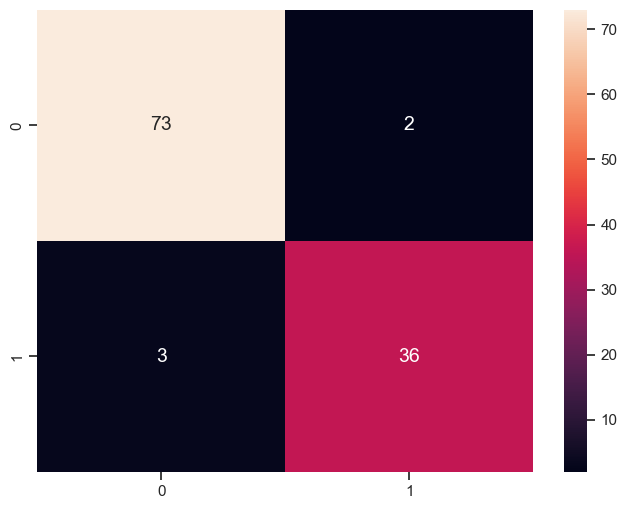

In [204]:
# LR Confusion matrix - multicollinear features removed

lr1_cm = confusion_matrix(y_test, prediction1)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(lr1_cm, annot=True,fmt="d", annot_kws={"fontsize": 14})

In [205]:
# Classification Report

print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        75
           1       0.95      0.92      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [206]:
# Decision Tree Result - After Multicollinearity Feature Removal

dtc = DecisionTreeClassifier(max_depth=9, min_samples_split=10, random_state=42)
model2 = dtc.fit(X_train, y_train)
prediction2 = model2.predict(X_test)

print("DT test accuracy:{:.4f}".format(accuracy_score(y_test, prediction2)))

DT test accuracy:0.8596


<Axes: >

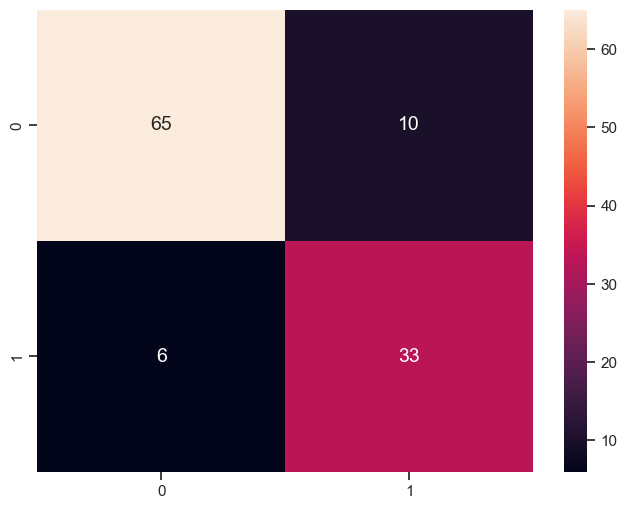

In [207]:
# DT Confusion matrix - After Multicollinearity Feature Removal

DT1_cm = confusion_matrix(y_test, prediction2)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(DT1_cm, annot=True, fmt="d", annot_kws={"fontsize": 14})

In [208]:
# DT Classification Report - After Multicollinearity Feature Removal

print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        75
           1       0.77      0.85      0.80        39

    accuracy                           0.86       114
   macro avg       0.84      0.86      0.85       114
weighted avg       0.86      0.86      0.86       114



In [209]:
# Random Forest Results - After Multicollinearity Feature Removal

from sklearn.model_selection import cross_val_score

# Instantiate the model with the given hyperparameters
rfc = RandomForestClassifier(bootstrap=False, max_features=10, min_samples_split=3, random_state=42)

# Fit the model on the training data
model3 = rfc.fit(X_train, y_train)

# Make predictions on the test data
prediction3 = model3.predict(X_test)

# Calculate the accuracy score
print("RF test accuracy:{:.4f}".format(accuracy_score(y_test, prediction3)))

RF test accuracy:0.9123


<Axes: >

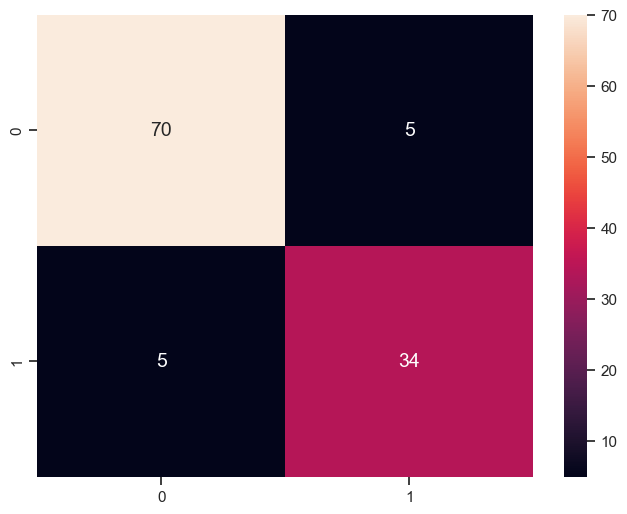

In [210]:
# Random Forest Confusion Matrix - After Multicollinearity Feature Removal
RF1_cm = confusion_matrix(y_test, prediction3)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(RF1_cm, annot=True, fmt="d", annot_kws={"fontsize": 14})

In [211]:
# Random Forest Classification Report - After Multicollinearity Feature Removal
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        75
           1       0.87      0.87      0.87        39

    accuracy                           0.91       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



In [212]:
# KNeighboursClassifiers Result - After Multicollinearity Removal

knc = KNeighborsClassifier()

knc = KNeighborsClassifier(metric='euclidean', n_neighbors=9)
model4 = knc.fit(X_train, y_train)
prediction4 = model4.predict(X_test)

print("KNN test accuracy:{:.4f}".format(accuracy_score(y_test, prediction4)))

KNN test accuracy:0.9474


<Axes: >

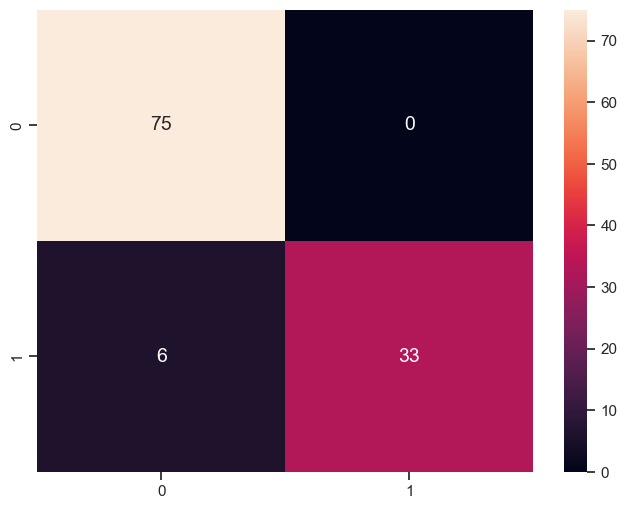

In [213]:
# KNC Confusion Matrix - After Multicollinearity Removal
KNN1_cm = confusion_matrix(y_test, prediction4)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(KNN1_cm, annot=True, fmt="d", annot_kws={"fontsize": 14})

In [214]:
# KNC Classification Report - After Multicollinearity Removal
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        75
           1       1.00      0.85      0.92        39

    accuracy                           0.95       114
   macro avg       0.96      0.92      0.94       114
weighted avg       0.95      0.95      0.95       114



In [215]:
# Support Vector Classifier - After Multicollinearity Removal
svc = SVC(random_state=42)
scores_svc = cross_val_score(svc, X, y, cv=10, scoring='accuracy')

model5 = svc.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
accuracy_score(y_test, prediction5)


print("SVC test accuracy:{:.4f}".format(accuracy_score(y_test, prediction5)))


SVC test accuracy:0.9649


<Axes: >

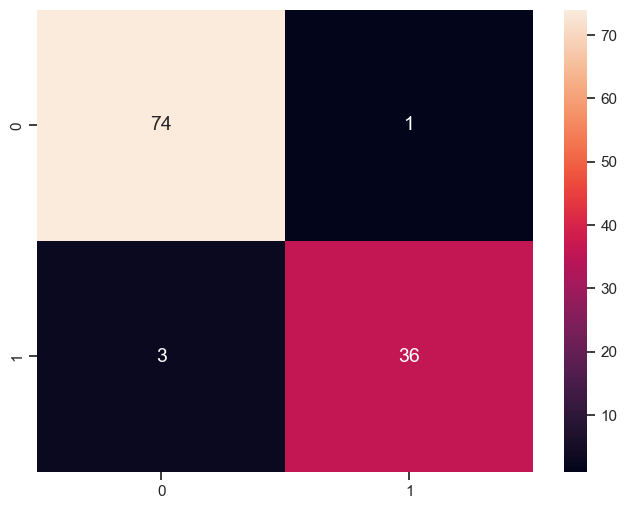

In [216]:
# SVC Confusion Matrix - After Multicollinearity Removal

SVC1_cm = confusion_matrix(y_test, prediction5)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(SVC1_cm, annot=True, fmt="d", annot_kws={"fontsize": 14})

In [217]:
# SVC Classification Report - After Multicollinearity Removal

print(classification_report(y_test, prediction5))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.97      0.92      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



# Building Two Breast Cancer Predictive Model

#### Predicting Cancer Type After Removing Multicollinear Features

In order to mitigate overfitting on the training data and enhance the generalization capability of the model, we constructed a breast cancer predictive model by utilizing the Support Vector Classification (SVC) algorithm, which has been applied after the removal of multicollinear features.

Feature names: radius_mean, texture_mean, smoothness_mean, compactness_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, smoothness_se, compactness_se, symmetry_se, fractal_dimension_se

In [218]:
# load the trained model
loaded_model = joblib.load('my_model.pkl')
# model = SVC(kernel='linear', C=1)

In [222]:
# get the input data from the user using  input function
input_data = input("Enter the values of the 12 features above separated by commas: ")

if input_data:
    # convert the input data into a numpy array
    input_data_array = np.asarray(tuple(map(float, input_data.split(','))))

    # reshape the numpy array as we are predicting for one datapoint
    input_data_reshaped = input_data_array.reshape(1, -1)

    # make a prediction on the input data
    prediction = loaded_model.predict(input_data_reshaped)

    # display the prediction result using Streamlit's write function
    if prediction[0] == 1:
        print("The Breast cancer is Malignant")
    else:
        print("The Breast cancer is Benign")



Enter the values of the 12 features above separated by commas: 14.99, 16.38 , 0.19840, 0.20760, 0.5419, 0.08871, 1.9950, 0.4053, 0.008399, 0.03904, 0.02003, 0.005193
The Breast cancer is Malignant


#### Predicting Cancer Type with the XGBoost - All Features Model

The model with the highest performance was the XGBoost Model - All features, which achieved a perfect precision and recall score of 1. Based on these results, the model was selected to build a predictive model for breast cancer to ensure consistently high accuracy.

Feature names: radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst


In [224]:
# load the trained model
loaded_model = joblib.load('xgb_model.pkl')

# loaded_model = joblib.load('xgb_model.pkl')

In [228]:
# get the input data from the user using  input function
input_data = input("Enter the values of the 30 features above separated by commas: ")

if input_data:
    # convert the input data into a numpy array
    input_data_array = np.asarray(tuple(map(float, input_data.split(','))))

    # reshape the numpy array as we are predicting for one datapoint
    input_data_reshaped = input_data_array.reshape(1, -1)

    # make a prediction on the input data
    prediction = loaded_model.predict(input_data_reshaped)

    # display the prediction result using Streamlit's write function
    if prediction[0] == 1:
        print("The Breast cancer is Malignant")
    else:
        print("The Breast cancer is Benign")


Enter the values of the 30 features above separated by commas: 13.54,	14.36,	87.46,	566.3,	0.09779, 0.08129, 0.06664, 0.04781,	0.1885,	0.05766,	0.2699,	0.7886,	2.058,	23.56,	0.008462,	0.0146,	0.02387,	0.01315,	0.0198,	0.0023,	15.11,	19.26,	99.7,	711.2,	0.144,	0.1773,	0.239,	0.1288,	0.2977,	0.07259
The Breast cancer is Benign
